# Preparation

In [ ]:
# data mining libaries
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sn
import matplotlib.pyplot as plt

#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) # to show plots in notebook

# online plotly
#from plotly.plotly import plot, iplot
#plotly.tools.set_credentials_file(username='XXXXXXXXXXXXXXX', api_key='XXXXXXXXXXXXXXX')

# offline plotly
from plotly.offline import plot, iplot

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')

SEED = 42 # specify seed for reproducable results
pd.set_option('display.max_columns', None) # prevents abbreviation (with '...') of columns in prints

# DATASET ANALYSIS

In [ ]:
# load the dataset
df = pd.read_csv("/content/FinalReport.csv")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
# df = df.query('Throughput > 10000')
print("The dataset has %d rows and %d columns" % df.shape)

The dataset has 13629 rows and 34 columns


In [ ]:
# Feature Selection
df = df [['RLC Throughput DL (kbps)' , 'MAC UL Throughput (kbps)' , 'Serving Cell RSRP','Throughput','RLC Throughput UL (kbps)','RS SINR Carrier 1', 'Serving Cell RSRQ','Throughput UL','PDSCH BLER Carrier 1 (%)',  'PDCCH Downlink Grant Count Current','PDCCH Uplink Grant Count Current']]

Text(0.5, 1.0, 'Correlation Matrix')

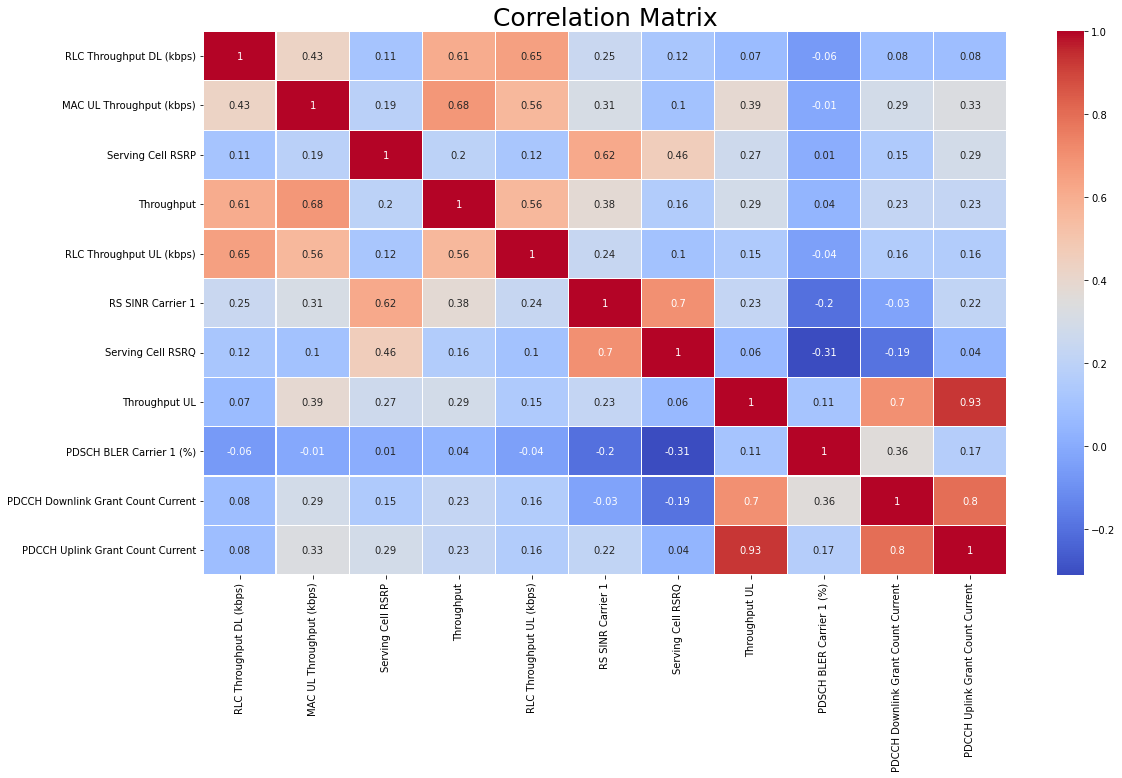

In [ ]:
import seaborn as sns
# Correlation Score
plt.figure(figsize=(18, 10))
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True,cmap='coolwarm', linewidths=0.3, )
plt.title("Correlation Matrix", size=25)

Text(0.5, 1.0, 'Correlation Matrix')

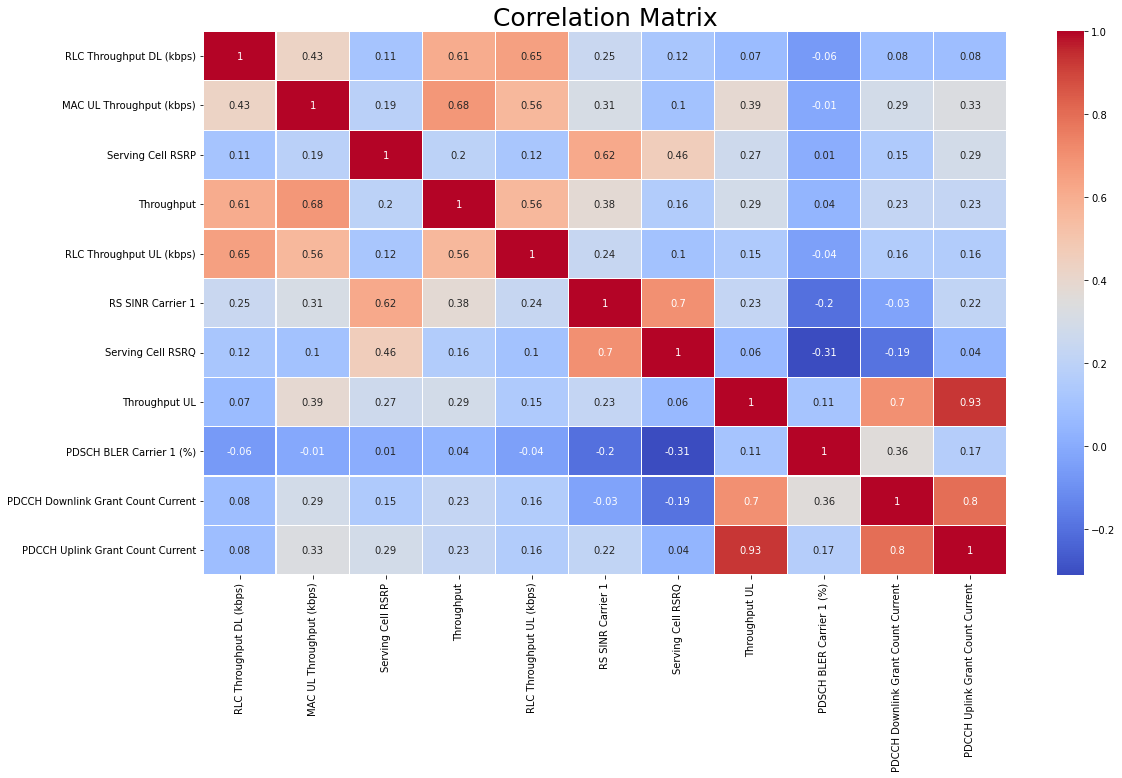

In [ ]:
import seaborn as sns
# Correlation Score
plt.figure(figsize=(18, 10))
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True,cmap='coolwarm', linewidths=0.3, )
plt.title("Correlation Matrix", size=25)

In [ ]:
df.describe()

RLC Throughput DL (kbps)  MAC UL Throughput (kbps)  Serving Cell RSRP  \
count              13628.000000              13628.000000       13629.000000   
mean                7216.197390                122.150385         -79.814968   
std                 6637.532924                 81.357870           9.691574   
min                    0.000000                  0.000000        -120.300003   
25%                 3229.845093                 69.367502         -86.699997   
50%                 6307.209961                119.120003         -79.400002   
75%                 8875.937256                163.202499         -72.699997   
max               211894.046900               1903.040039         -52.400002   

         Throughput  RLC Throughput UL (kbps)  RS SINR Carrier 1  \
count  13629.000000              13628.000000       13629.000000   
mean    7134.788691                125.821340           4.706327   
std     3889.152927                101.819005           5.806205   
min        0.020000                  0.000000         -11.800000   
25%     4366.540039                 62.009998           0.600000   
50%     7264.299805                117.064999           4.200000   
75%     9697.000000                157.342499           8.400000   
max    35842.109380               1746.780029          28.500000   

       Serving Cell RSRQ  Throughput UL  PDSCH BLER Carrier 1 (%)  \
count       13629.000000   13629.000000              13629.000000   
mean          -14.712239     647.659809                 15.337677   
std             2.830394     441.292607                  8.576533   
min           -30.000000       0.000000                  0.000000   
25%           -16.299999     303.329987                 10.770000   
50%           -14.300000     561.440002                 13.800000   
75%           -12.800000     960.289978                 20.139999   
max            -5.900000    1718.619995                100.000000   

       PDCCH Downlink Grant Count Current  PDCCH Uplink Grant Count Current  
count                        13628.000000                      13628.000000  
mean                          1171.654558                        795.021332  
std                            589.450993                        530.696642  
min                              0.000000                          0.000000  
25%                            809.000000                        386.750000  
50%                           1228.000000                        714.000000  
75%                           1641.000000                       1203.250000  
max                           6412.000000                       3399.000000

In [ ]:
df.columns

Index(['RLC Throughput DL (kbps)', 'MAC UL Throughput (kbps)',
       'Serving Cell RSRP', 'Throughput', 'RLC Throughput UL (kbps)',
       'RS SINR Carrier 1', 'Serving Cell RSRQ', 'Throughput UL',
       'PDSCH BLER Carrier 1 (%)', 'PDCCH Downlink Grant Count Current',
       'PDCCH Uplink Grant Count Current'],
      dtype='object')

In [ ]:
count_nan = df.isna().sum().sum()
print ('Count of NaN/NULL values: ' + str(count_nan))

Count of NaN/NULL values: 5


In [ ]:
df = df.dropna()

In [ ]:
## More than 3Mbps throughput filteration 
# DataBiggerThan3Mbps = df 
# DataBiggerThan3Mbps = df.query('Throughput > 3000')
# DataBiggerThan3Mbps.describe()

In [ ]:
df.head(3)

RLC Throughput DL (kbps)  MAC UL Throughput (kbps)  Serving Cell RSRP  \
0               7119.502785                122.982238         -90.500000   
1               7119.502785                  4.100000         -91.000000   
2                  0.020000                  0.840000         -89.900002   

   Throughput  RLC Throughput UL (kbps)  RS SINR Carrier 1  Serving Cell RSRQ  \
0        0.49                125.701727                0.5              -13.5   
1       11.81                 24.000000               -0.8              -13.5   
2        0.37                  0.410000               -1.0              -13.5   

   Throughput UL  PDSCH BLER Carrier 1 (%)  \
0     638.419165                       0.0   
1     638.419165                       0.0   
2      28.730000                       0.0   

   PDCCH Downlink Grant Count Current  PDCCH Uplink Grant Count Current  
0                         1186.506835                        784.946444  
1                           11.000000                         51.000000  
2                            4.000000                         51.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13628 entries, 0 to 13627
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   RLC Throughput DL (kbps)            13628 non-null  float64
 1   MAC UL Throughput (kbps)            13628 non-null  float64
 2   Serving Cell RSRP                   13628 non-null  float64
 3   Throughput                          13628 non-null  float64
 4   RLC Throughput UL (kbps)            13628 non-null  float64
 5   RS SINR Carrier 1                   13628 non-null  float64
 6   Serving Cell RSRQ                   13628 non-null  float64
 7   Throughput UL                       13628 non-null  float64
 8   PDSCH BLER Carrier 1 (%)            13628 non-null  float64
 9   PDCCH Downlink Grant Count Current  13628 non-null  float64
 10  PDCCH Uplink Grant Count Current    13628 non-null  float64
dtypes: float64(11)
memory usage: 1.2 MB


In [ ]:
# df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13628 entries, 0 to 13627
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   RLC Throughput DL (kbps)            13628 non-null  float64
 1   MAC UL Throughput (kbps)            13628 non-null  float64
 2   Serving Cell RSRP                   13628 non-null  float64
 3   Throughput                          13628 non-null  float64
 4   RLC Throughput UL (kbps)            13628 non-null  float64
 5   RS SINR Carrier 1                   13628 non-null  float64
 6   Serving Cell RSRQ                   13628 non-null  float64
 7   Throughput UL                       13628 non-null  float64
 8   PDSCH BLER Carrier 1 (%)            13628 non-null  float64
 9   PDCCH Downlink Grant Count Current  13628 non-null  float64
 10  PDCCH Uplink Grant Count Current    13628 non-null  float64
dtypes: float64(11)
memory usage: 1.2 MB


In [ ]:
def preprocess_data(df):
    pre_df = df.copy()
    return pre_df

In [ ]:
pre_df = preprocess_data(df)
pre_df.head(3)

RLC Throughput DL (kbps)  MAC UL Throughput (kbps)  Serving Cell RSRP  \
0               7119.502785                122.982238         -90.500000   
1               7119.502785                  4.100000         -91.000000   
2                  0.020000                  0.840000         -89.900002   

   Throughput  RLC Throughput UL (kbps)  RS SINR Carrier 1  Serving Cell RSRQ  \
0        0.49                125.701727                0.5              -13.5   
1       11.81                 24.000000               -0.8              -13.5   
2        0.37                  0.410000               -1.0              -13.5   

   Throughput UL  PDSCH BLER Carrier 1 (%)  \
0     638.419165                       0.0   
1     638.419165                       0.0   
2      28.730000                       0.0   

   PDCCH Downlink Grant Count Current  PDCCH Uplink Grant Count Current  
0                         1186.506835                        784.946444  
1                           11.000000                         51.000000  
2                            4.000000                         51.000000

In [ ]:
print("The dataset has %d rows and %d columns." % pre_df.shape)

The dataset has 13628 rows and 11 columns.


In [ ]:
pre_df.describe()

RLC Throughput DL (kbps)  MAC UL Throughput (kbps)  Serving Cell RSRP  \
count              13628.000000              13628.000000       13628.000000   
mean                7216.197390                122.150385         -79.814323   
std                 6637.532924                 81.357870           9.691637   
min                    0.000000                  0.000000        -120.300003   
25%                 3229.845093                 69.367502         -86.699997   
50%                 6307.209961                119.120003         -79.400002   
75%                 8875.937256                163.202499         -72.699997   
max               211894.046900               1903.040039         -52.400002   

         Throughput  RLC Throughput UL (kbps)  RS SINR Carrier 1  \
count  13628.000000              13628.000000       13628.000000   
mean    7135.048443                125.821340           4.706745   
std     3889.177398                101.819005           5.806212   
min        0.020000                  0.000000         -11.800000   
25%     4368.992554                 62.009998           0.600000   
50%     7264.364991                117.064999           4.250000   
75%     9697.182617                157.342499           8.400000   
max    35842.109380               1746.780029          28.500000   

       Serving Cell RSRQ  Throughput UL  PDSCH BLER Carrier 1 (%)  \
count       13628.000000   13628.000000              13628.000000   
mean          -14.712027     647.687680                 15.337151   
std             2.830390     441.296803                  8.576628   
min           -30.000000       0.000000                  0.000000   
25%           -16.299999     303.389999                 10.770000   
50%           -14.300000     561.464996                 13.800000   
75%           -12.800000     960.294983                 20.139999   
max            -5.900000    1718.619995                100.000000   

       PDCCH Downlink Grant Count Current  PDCCH Uplink Grant Count Current  
count                        13628.000000                      13628.000000  
mean                          1171.654558                        795.021332  
std                            589.450993                        530.696642  
min                              0.000000                          0.000000  
25%                            809.000000                        386.750000  
50%                           1228.000000                        714.000000  
75%                           1641.000000                       1203.250000  
max                           6412.000000                       3399.000000

# DATA VISUALIZATION

<Figure size 720x720 with 0 Axes>

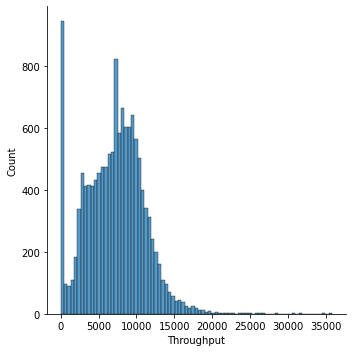

In [ ]:
plt.figure(figsize=(10, 10))
sns.displot(pre_df['Throughput'])

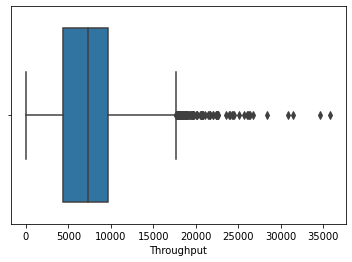

In [ ]:
sns.boxplot(x=pre_df['Throughput'])

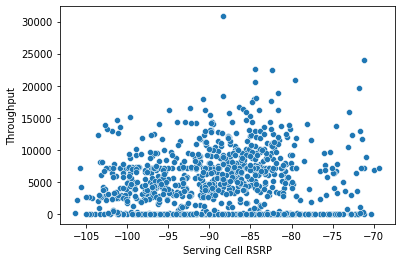

In [ ]:
dfplot = pre_df.head(1000)
sns.scatterplot(data=dfplot,x='Serving Cell RSRP',y='Throughput')

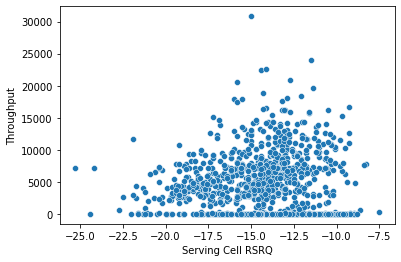

In [ ]:
sns.scatterplot(data=dfplot,x='Serving Cell RSRQ',y='Throughput')

In [ ]:
# sns.scatterplot(data=dfplot,x='CQI',y='Throughput')

# Z Score Filteration

In [ ]:
pre_df = pre_df.query('Throughput > 1400')
pre_df['Throughput'].value_counts(sort=False,bins=25 ,ascending=True)

(1365.877, 2777.992]       747
(2777.992, 4155.663]      1312
(4155.663, 5533.335]      1400
(5533.335, 6911.006]      1539
(6911.006, 8288.678]      2118
(8288.678, 9666.349]      1918
(9666.349, 11044.021]     1540
(11044.021, 12421.693]     941
(12421.693, 13799.364]     467
(13799.364, 15177.036]     216
(15177.036, 16554.707]     124
(16554.707, 17932.379]      69
(17932.379, 19310.05]       37
(19310.05, 20687.722]       18
(20687.722, 22065.394]      11
(22065.394, 23443.065]       7
(23443.065, 24820.737]       6
(24820.737, 26198.408]       4
(26198.408, 27576.08]        3
(27576.08, 28953.751]        1
(28953.751, 30331.423]       0
(30331.423, 31709.095]       2
(31709.095, 33086.766]       0
(33086.766, 34464.438]       0
(34464.438, 35842.109]       2
Name: Throughput, dtype: int64

In [ ]:
## Z Score // Z = (X - mean) / std
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(pre_df))
print(z)

[[0.10959889 0.12344809 0.90510039 ... 2.08788987 2.5088856  1.70443919]
 [0.10959889 0.12344809 0.6531212  ... 2.08788987 0.16758465 0.1506904 ]
 [0.10959889 0.12344809 0.70561683 ... 2.08788987 0.16758465 0.1506904 ]
 ...
 [0.69479259 0.87958911 1.15707879 ... 0.69330193 0.61546424 0.77172925]
 [0.90800254 1.1537578  1.40905799 ... 0.21188883 0.83665715 0.7439464 ]
 [0.82980682 0.92749703 1.05208753 ... 1.14677921 1.26719335 0.42642812]]


In [ ]:
threshold = 2.8
print(np.where(z > 2.8))

(array([   18,    29,    43, ..., 12428, 12428, 12437]), array([6, 1, 4, ..., 0, 4, 8]))


In [ ]:
print(z[65][6])

0.4635722597810574


In [ ]:
pre_df = pre_df[(z < 2.8).all(axis=1)]

In [ ]:
print("The dataset has %d rows and %d columns." % pre_df.shape)

The dataset has 11397 rows and 11 columns.


In [ ]:
pre_df.describe()

RLC Throughput DL (kbps)  MAC UL Throughput (kbps)  Serving Cell RSRP  \
count              11397.000000              11397.000000       11397.000000   
mean                7194.300893                126.988372         -78.917803   
std                 4552.519271                 59.160538           9.424489   
min                    0.000000                  0.000000        -105.599998   
25%                 4008.120117                 83.400002         -85.599998   
50%                 6594.600098                122.982238         -78.400002   
75%                 8916.769531                164.139999         -72.000000   
max                26206.179690                346.769989         -53.599998   

         Throughput  RLC Throughput UL (kbps)  RS SINR Carrier 1  \
count  11397.000000              11397.000000       11397.000000   
mean    7564.903916                125.838560           5.010591   
std     3081.475669                 71.352493           5.728723   
min     1400.319946                  0.000000          -9.800000   
25%     5187.759766                 75.209999           0.900000   
50%     7573.520020                121.769997           4.600000   
75%     9695.700195                157.750000           8.800000   
max    17251.410160                413.769989          21.200001   

       Serving Cell RSRQ  Throughput UL  PDSCH BLER Carrier 1 (%)  \
count       11397.000000   11397.000000              11397.000000   
mean          -14.647714     715.233493                 15.655988   
std             2.552697     431.804037                  6.281118   
min           -22.400000       0.700000                  0.000000   
25%           -16.200001     355.779999                 11.290000   
50%           -14.300000     633.150024                 14.220000   
75%           -12.800000    1057.290039                 20.299999   
max            -7.500000    1718.619995                 37.599998   

       PDCCH Downlink Grant Count Current  PDCCH Uplink Grant Count Current  
count                        11397.000000                      11397.000000  
mean                          1288.864806                        881.232665  
std                            482.052644                        504.731722  
min                              0.000000                          0.000000  
25%                            978.000000                        482.000000  
50%                           1317.000000                        788.000000  
75%                           1689.000000                       1288.000000  
max                           2597.000000                       2156.000000

In [ ]:
pre_df['Throughput'].value_counts(sort=False,bins=25 ,ascending=True)

(1384.468, 2034.364]      152
(2034.364, 2668.407]      399
(2668.407, 3302.451]      594
(3302.451, 3936.494]      542
(3936.494, 4570.538]      558
(4570.538, 5204.582]      618
(5204.582, 5838.625]      633
(5838.625, 6472.669]      665
(6472.669, 7106.712]      959
(7106.712, 7740.756]      788
(7740.756, 8374.8]        894
(8374.8, 9008.843]        824
(9008.843, 9642.887]      846
(9642.887, 10276.93]      778
(10276.93, 10910.974]     575
(10910.974, 11545.018]    438
(11545.018, 12179.061]    342
(12179.061, 12813.105]    260
(12813.105, 13447.149]    180
(13447.149, 14081.192]    113
(14081.192, 14715.236]     78
(14715.236, 15349.279]     59
(15349.279, 15983.323]     45
(15983.323, 16617.367]     40
(16617.367, 17251.41]      17
Name: Throughput, dtype: int64

# Visualization 

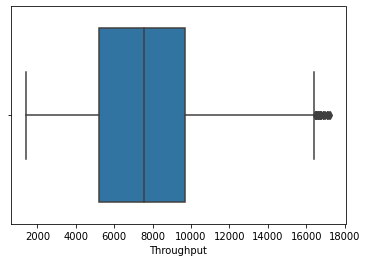

In [ ]:
sn.boxplot(x=pre_df['Throughput'])

<Figure size 576x360 with 0 Axes>

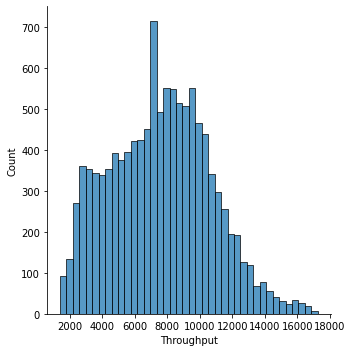

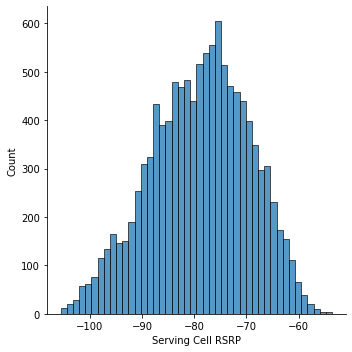

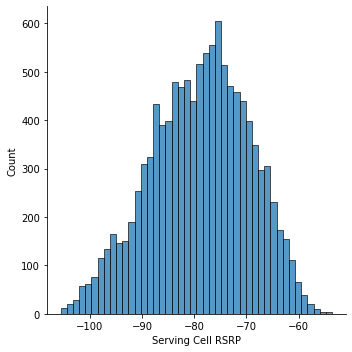

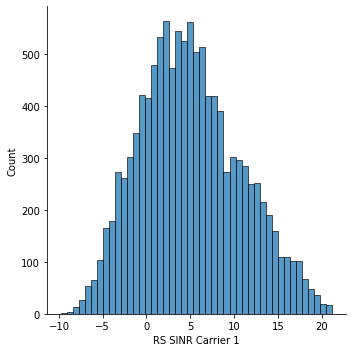

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.displot(pre_df['Throughput'])
sns.displot(pre_df['Serving Cell RSRP'])
sns.displot(pre_df['Serving Cell RSRP'])
sns.displot(pre_df['RS SINR Carrier 1'])
# sns.displot(pre_df['Serving Cell Channel RSSI'])


In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

In [ ]:
# ax = sn.scatterplot(x=pre_df['Serving Cell Channel RSSI'], y=pre_df['RS SINR Carrier 1'], s=100,alpha=0.1, palette="icefire", hue=pre_df['Throughput'])
# plt.title('DL-bitrate relationship between SINR and RSSI')
# # Remove the legend and add a colorbar
# plt.show()

In [ ]:
# ax = sn.scatterplot(x=pre_df['Drive_Lon'], y=pre_df['Drive_Lat'], s=100,alpha=0.1, palette="Spectral", hue=pre_df['Throughput'])
# plt.title('DL-bitrate in each geometry coordinates (kbps)')
# # Remove the legend and add a colorbar
# plt.show()

In [ ]:
# ax = sn.scatterplot(x=pre_df['Drive_Lon'], y=pre_df['Drive_Lat'], s=100,alpha=0.1, palette="Spectral", hue=pre_df['Serving Cell RSRP'])
# plt.title('RSRP in each geometry coordinates (dBm)')
# # Remove the legend and add a colorbar
# plt.show()

In [ ]:
# ax = sn.scatterplot(x=pre_df['Drive_Lon'], y=pre_df['Drive_Lat'], s=100,alpha=0.1, palette="Spectral", hue=pre_df['Serving Cell RSRQ'])
# plt.title('RSRQ in each geometry coordinates (dBm)')
# # Remove the legend and add a colorbar
# plt.show()

In [ ]:
# ax = sn.scatterplot(x=pre_df['Drive_Lon'], y=pre_df['Drive_Lat'], s=100,alpha=0.1, palette="Spectral", hue=pre_df['RS SINR Carrier 1'])
# plt.title('SINR in each geometry coordinates (dBm)')
# # Remove the legend and add a colorbar
# plt.show()

In [ ]:
# ax = sn.scatterplot(x=pre_df['Drive_Lon'], y=pre_df['Drive_Lat'], s=100,alpha=0.1, palette="Spectral", hue=pre_df['Serving Cell Channel RSSI'])
# plt.title('RSSI in each geometry coordinates (dBm)')
# # Remove the legend and add a colorbar
# plt.show()

# Data Splitting 

In [ ]:
# Labels are the values we want to predict
labels = np.array(pre_df['Throughput'])
# Remove the labels from the features
# axis 1 refers to the columns
features= pre_df.drop('Throughput', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn import model_selection
# Split the data into training and testing sets
x_train, x_test, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler(feature_range=(0,10))
train_features = s.fit_transform(x_train)
test_features = s.transform(x_test)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (7977, 10)
Training Labels Shape: (7977,)
Testing Features Shape: (3420, 10)
Testing Labels Shape: (3420,)


# Time Function

In [ ]:
import datetime
from datetime import datetime, timedelta
def posix_time(dt):
                return (dt - datetime(1970, 1, 1)) / timedelta(seconds=1)

# Random Forest Model

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model 
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
rf = RandomForestRegressor(n_estimators = 400,random_state = 42,bootstrap=False,max_depth = None,min_samples_leaf=1,min_samples_split=2)
# Train the model on training data
rf.fit(train_features, train_labels);
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
rf_duration = t1-t0
print(rf_duration)

41.68704891204834


In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
# errors = abs(predictions - test_labels)
# # Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'kbps.')

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: RLC Throughput DL (kbps) Importance: 0.63
Variable: MAC UL Throughput (kbps) Importance: 0.15
Variable: PDSCH BLER Carrier 1 (%) Importance: 0.04
Variable: RLC Throughput UL (kbps) Importance: 0.03
Variable: PDCCH Downlink Grant Count Current Importance: 0.03
Variable: PDCCH Uplink Grant Count Current Importance: 0.03
Variable: Serving Cell RSRP    Importance: 0.02
Variable: RS SINR Carrier 1    Importance: 0.02
Variable: Serving Cell RSRQ    Importance: 0.02
Variable: Throughput UL        Importance: 0.02


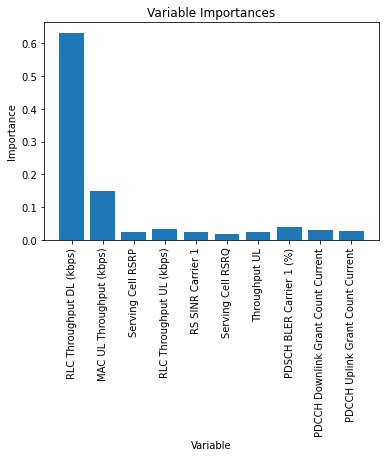

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
plt.figure(figsize=(18, 10))
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

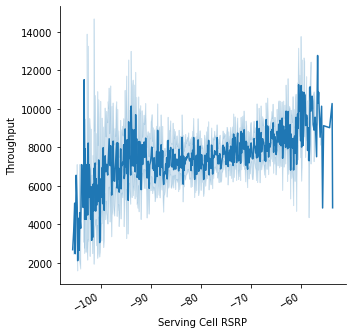

In [ ]:
g = sn.relplot(x ="Serving Cell RSRP", y="Throughput", kind="line", data=pre_df)
g.fig.autofmt_xdate()

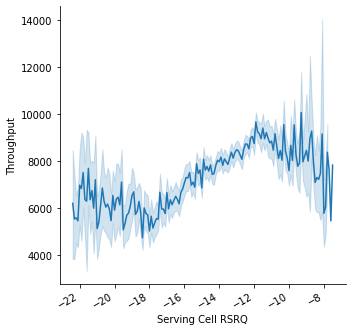

In [ ]:
g = sn.relplot(x ="Serving Cell RSRQ", y="Throughput", kind="line", data=pre_df)
g.fig.autofmt_xdate()

Evaluating the Algorithm

In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')

Mean Absolute Error: 1214.4113263494555 Kbps
Mean Squared Error: 3510790.2369987476 Kbps
Root Mean Squared Error: 1873.7102863032874 Kbps
Mean Absolute Percentage Error: 0.17393262701222348 %


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for random forest model is', "{:.2f}".format(r2*100) ,'%')

R2 score for random forest model is 62.36 %


In [ ]:
print('actuals', test_labels)

actuals [ 7851.850098 11727.08984   5691.549805 ...  7315.649902  6805.459961
  3179.550049]


In [ ]:
print('actuals', predictions)

actuals [ 7675.23417628 11613.21034415  7679.74606203 ...  6549.63426504
  6607.44052374  1697.34718654]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0      7851.850098   7675.234176
1     11727.089840  11613.210344
2      5691.549805   7679.746062
3      8156.450195   8826.860493
4      8185.080078   8448.969727
...            ...           ...
3415   6616.799805   7605.027656
3416   8229.059570   8821.535525
3417   7315.649902   6549.634265
3418   6805.459961   6607.440524
3419   3179.550049   1697.347187

[3420 rows x 2 columns]

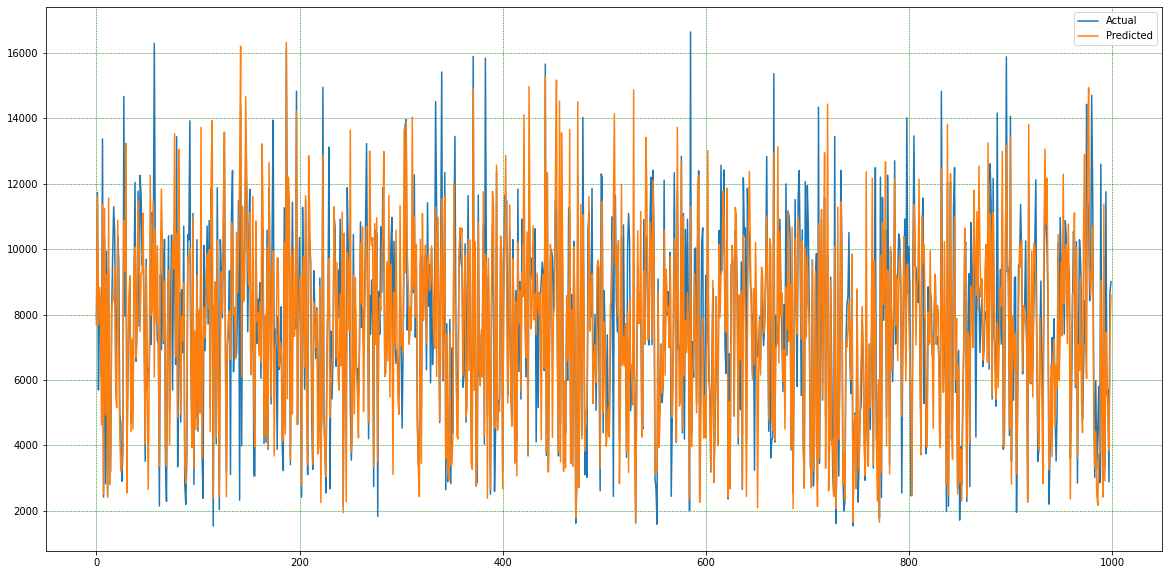

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

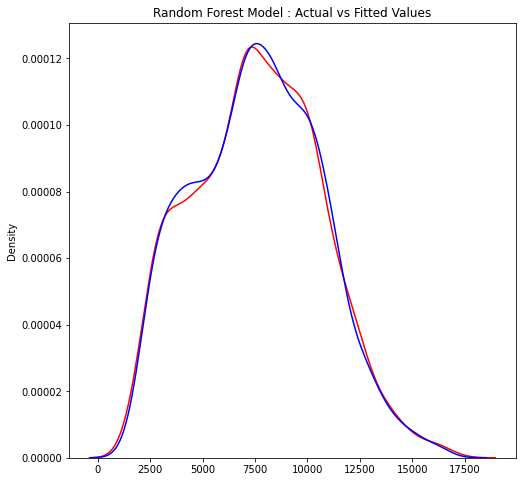

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Random Forest Model : Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
rf.score(test_features,test_labels)

0.623631335841411

# Random Search with Cross Validation for Random Forest

Examine the Default Random Forest to Determine Parameters
We will use these parameters as a starting point. I relied on the sklearn random forest documentation to determine which features to change and the available options.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50,
                  89,
                  129,
                  169,
                  209,
                  248,
                  288,
                  328,
                  368,
                  408,
                  447,
                  487,
                  527,
                  567,
                  607,
                  646,
                  686,
                  726,
                  766,
                  806,
                  845,
                  885,
                  925,
                  965,
                  1005,
                  1044,
                  1084,
                  1124,
                  1164,
                  1204,
                  1243,
                  1283,
                  1323,
                  1363,
            

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# rfModified = RandomForestRegressor(random_state = 42)
# rfModified.fit(train_features, train_labels);
# Fit the random search model
rf_random.fit(train_features, train_labels);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 368}

In [ ]:
# rf_random.cv_results_

Evaluation Function

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} Kbps.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

Evaluate the default model

In [ ]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_accuracy = evaluate(base_model, test_features, test_labels)

Model Performance
Average Error: 785.5383 Kbps.
Accuracy = 88.03%.


Evaluate the Best Random Search Model

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)

Model Performance
Average Error: 726.0238 Kbps.
Accuracy = 89.01%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 1.12%.


# Grid Search for Random Forest
We can now perform grid search building on the result from the random search. We will test a range of hyperparameters around the best values returned by random search.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000,1500,2000]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [ ]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels);

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 2000}

Evaluate the Best Model from Grid Search

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)

NameError: ignored

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Grid Search 2

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [110, 120, None],
    'max_features': [3, 4],
    'min_samples_leaf': [5, 6, 7],
    'min_samples_split': [10],
    'n_estimators': [75, 100, 125]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search_final = GridSearchCV(estimator = rf, param_grid = param_grid, 
                                 cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

grid_search_final.fit(train_features, train_labels);

In [ ]:
grid_search_final.best_params_

In [ ]:
best_grid_final = grid_search_final.best_estimator_
grid_final_accuracy = evaluate(best_grid_final, test_features, test_labels)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_final_accuracy - base_accuracy) / base_accuracy))

Final Model
The final model from hyperparameter tuning is as follows.

In [ ]:
final_model = grid_search.best_estimator_

print('Final Model Parameters:\n')
pprint(final_model.get_params())
print('\n')
grid_final_accuracy = evaluate(final_model, test_features, test_labels)

# Random Forest Model with Hyperparameters Tuning 

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model 
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
rf1 = RandomForestRegressor(n_estimators = 2000,random_state = 42,bootstrap=True,max_depth = 80,max_features=3,min_samples_leaf=3,min_samples_split=8)
# Train the model on training data
rf1.fit(train_features, train_labels);
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
rf1_duration = t1-t0
print(rf1_duration)

36.911526918411255


In [ ]:
# Use the forest's predict method on the test data
predictions = rf1.predict(test_features)
# Calculate the absolute errors
# errors = abs(predictions - test_labels)
# # Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'kbps.')

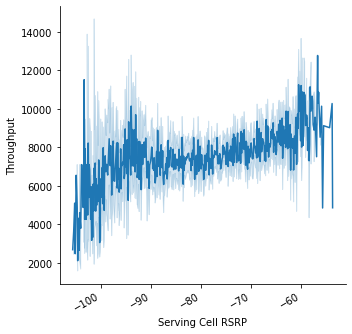

In [ ]:
g = sn.relplot(x ="Serving Cell RSRP", y="Throughput", kind="line", data=pre_df)
g.fig.autofmt_xdate()

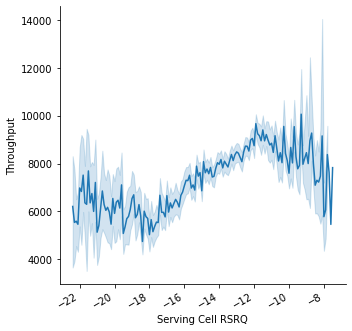

In [ ]:
g = sn.relplot(x ="Serving Cell RSRQ", y="Throughput", kind="line", data=pre_df)
g.fig.autofmt_xdate()

Evaluating the Algorithm

In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')

Mean Absolute Error: 906.3013369711576 Kbps
Mean Squared Error: 1904385.4101407463 Kbps
Root Mean Squared Error: 1379.9947138089865 Kbps
Mean Absolute Percentage Error: 0.13404385642045485 %


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for random forest model is', "{:.2f}".format(r2*100) ,'%')

R2 score for random forest model is 79.58 %


In [ ]:
print('actuals', test_labels)

actuals [ 7851.850098 11727.08984   5691.549805 ...  7315.649902  6805.459961
  3179.550049]


In [ ]:
print('actuals', predictions)

actuals [ 8053.97744552 10831.51766365  6922.84924134 ...  6982.46102226
  6929.98676294  4628.59178829]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0      7851.850098   8053.977446
1     11727.089840  10831.517664
2      5691.549805   6922.849241
3      8156.450195  10372.890031
4      8185.080078   7703.349351
...            ...           ...
3415   6616.799805   7900.840731
3416   8229.059570   9753.423941
3417   7315.649902   6982.461022
3418   6805.459961   6929.986763
3419   3179.550049   4628.591788

[3420 rows x 2 columns]

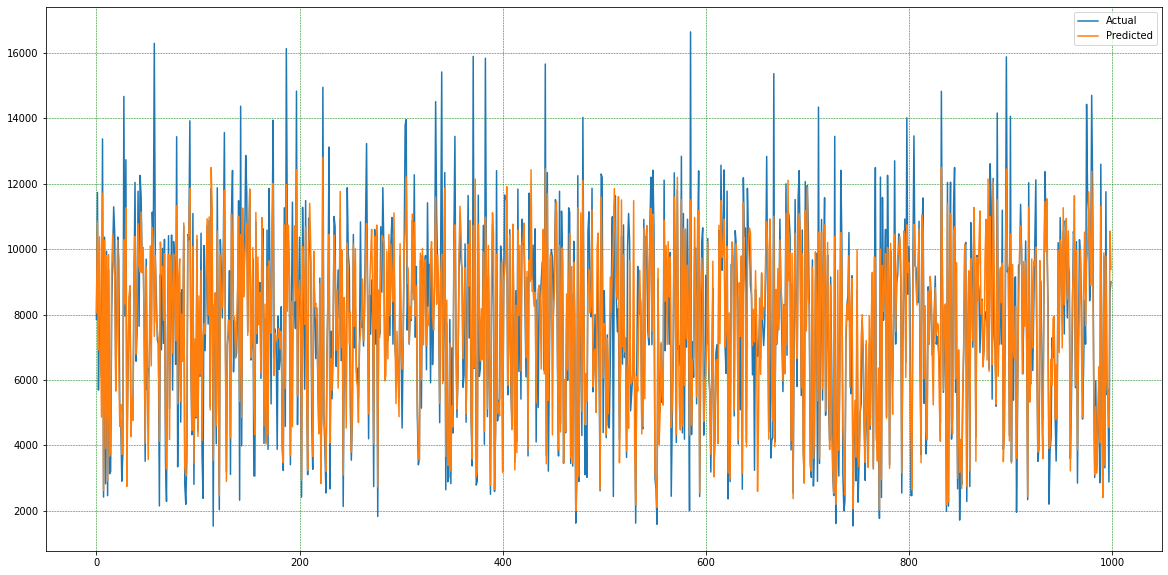

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

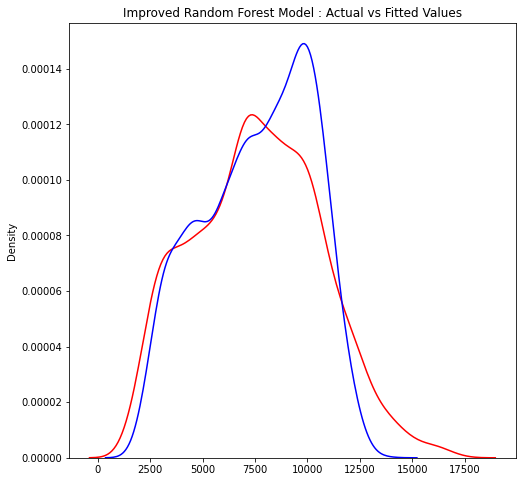

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Improved Random Forest Model : Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
rf1.score(test_features,test_labels)

0.7958434014928488

In [ ]:
# plt.style.use('seaborn')
# y_pred = rf1.predict(train_features)
# print("R-squared for train data",rf1.score(train_features, train_labels))
# sns.scatterplot(train_labels, y_pred)
# plt.title('Train count Vs Prediction')
# plt.xlabel("y_train")
# plt.ylabel("y_pred")
# plt.show()

# ExtraTreeRegressor

In [ ]:
# Import the model we are using
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
# Instantiate model 
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
extra_tree = ExtraTreeRegressor(random_state=42)
# Train the model on training data
reg = BaggingRegressor(extra_tree, random_state=42,n_estimators=400).fit(train_features, train_labels)
reg.score(test_features, test_labels)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
extratree_duration = t1-t0
print(extratree_duration)

7.335768938064575


In [ ]:
# Use the forest's predict method on the test data
predictions = reg.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'kbps.')

Mean Absolute Error: 889.61 kbps.


In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')
from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for ExtraTree Regressor model is', "{:.2f}".format(r2*100) ,'%')

Mean Absolute Error: 889.6142022540824 Kbps
Mean Squared Error: 1891993.2114560183 Kbps
Root Mean Squared Error: 1375.49744145746 Kbps
Mean Absolute Percentage Error: 0.12952071531423498 %
R2 score for ExtraTree Regressor model is 79.72 %


In [ ]:
print('actuals', test_labels)

actuals [ 7851.850098 11727.08984   5691.549805 ...  7315.649902  6805.459961
  3179.550049]


In [ ]:
print('actuals', predictions)

actuals [ 7981.61413576 10821.63846173  6801.38186225 ...  7068.48126533
  7045.8676404   5008.83791828]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0      7851.850098   7981.614136
1     11727.089840  10821.638462
2      5691.549805   6801.381862
3      8156.450195  10465.087302
4      8185.080078   7809.079894
...            ...           ...
3415   6616.799805   8081.832219
3416   8229.059570  10209.487689
3417   7315.649902   7068.481265
3418   6805.459961   7045.867640
3419   3179.550049   5008.837918

[3420 rows x 2 columns]

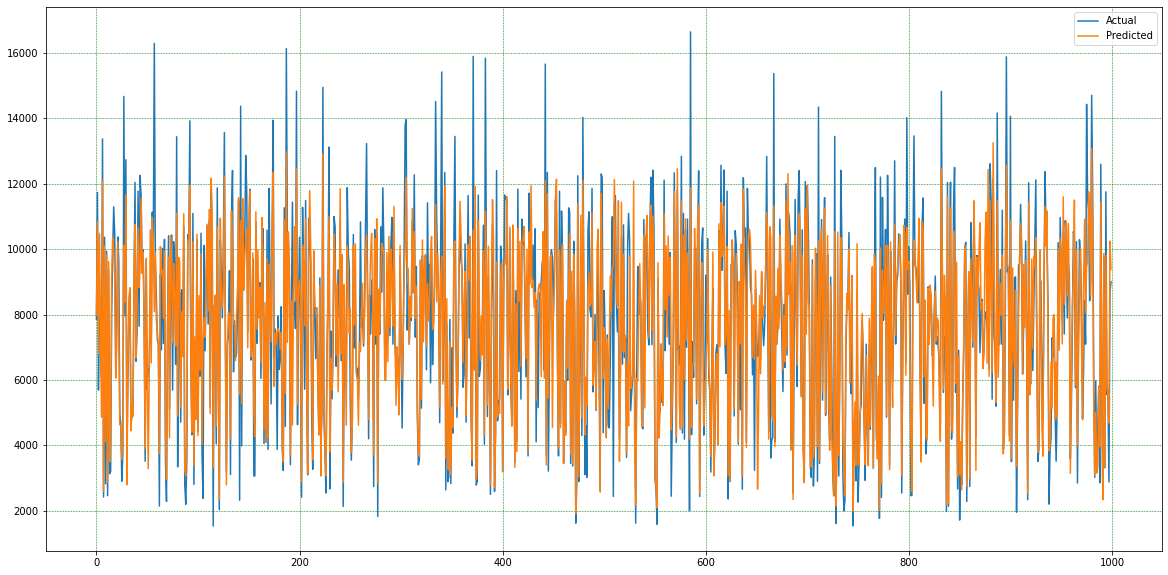

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

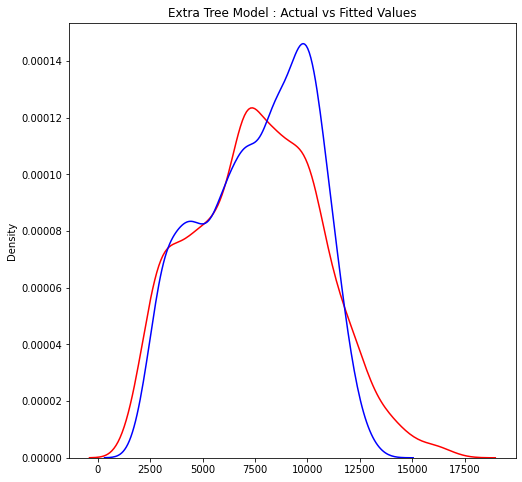

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Extra Tree Model : Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
reg.score(test_features,test_labels)

0.7971718873749749

# Model Development with AdaBoost Regressor


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
AdaBoost1 = AdaBoostRegressor(n_estimators=400)
AdaBoost1.fit(train_features, train_labels)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
AdaBoost1_duration = t1-t0
print(AdaBoost1_duration)

4.383664131164551


In [ ]:
predictions = AdaBoost1.predict(test_features)

In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')

from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for AdaBoostRegressor model is', "{:.2f}".format(r2*100) ,'%')

Mean Absolute Error: 1946.6141806085511 Kbps
Mean Squared Error: 5372017.36775572 Kbps
Root Mean Squared Error: 2317.7612836001294 Kbps
Mean Absolute Percentage Error: 0.3437167163177037 %
R2 score for AdaBoostRegressor model is 42.41 %


In [ ]:
print('actuals', test_labels)

actuals [ 7851.850098 11727.08984   5691.549805 ...  7315.649902  6805.459961
  3179.550049]


In [ ]:
print('actuals', predictions)

actuals [11225.287572   11454.06894681  8732.32832365 ...  7635.98367632
  7834.19273218  5286.52594116]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0      7851.850098  11225.287572
1     11727.089840  11454.068947
2      5691.549805   8732.328324
3      8156.450195  11636.660594
4      8185.080078   9320.150628
...            ...           ...
3415   6616.799805  11418.109711
3416   8229.059570  11613.864315
3417   7315.649902   7635.983676
3418   6805.459961   7834.192732
3419   3179.550049   5286.525941

[3420 rows x 2 columns]

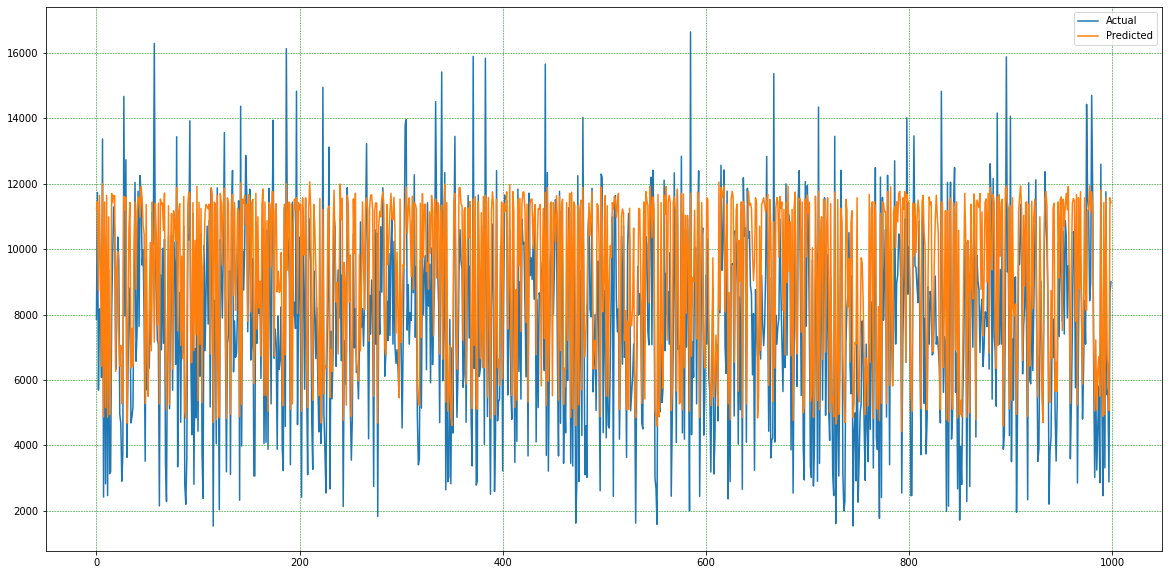

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

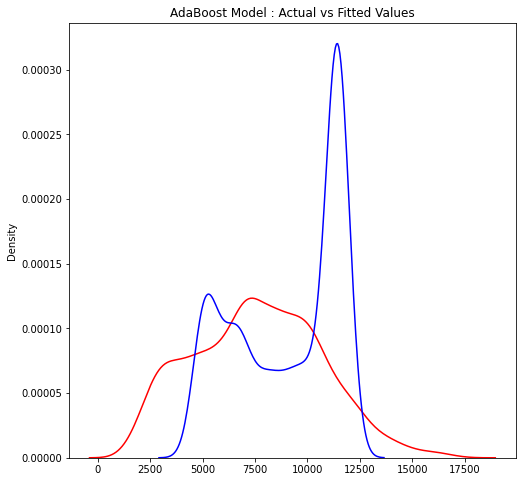

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('AdaBoost Model : Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
AdaBoost1.score(test_features,test_labels)

0.42410145179525827

# Adaboost HyperParameters Tuning

In [ ]:
AdaBoost1.get_params(deep=True)

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 400,
 'random_state': None}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = AdaBoostRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0,10],
 'n_estimators' : [50, 100, 400,800],
 'loss' : ['linear', 'square', 'exponential']
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(train_features, train_labels)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")
# Evaluate the model using the test data
predictions = model.predict(test_features)
mse = mean_squared_error(test_labels, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(test_labels, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(test_labels, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Downlink Throughput Prediction')
# overlay the regression line
z = np.polyfit(test_labels, predictions, 1)
p = np.poly1d(z)
plt.plot(test_labels,p(test_labels), color='magenta')
plt.show()

Best parameter combination: {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 50} 

AdaBoostRegressor(learning_rate=0.1, loss='exponential') 



NameError: ignored

# Adaboost Model With Hyperparameters Tunning

In [ ]:
## Best parameter combination: {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 50} 

from sklearn.ensemble import AdaBoostRegressor
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
AdaBoost2 = AdaBoostRegressor(learning_rate=0.1, loss='exponential',n_estimators=50)
AdaBoost2.fit(train_features, train_labels)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
AdaBoost2_duration = t1-t0
print(AdaBoost2_duration)

1.3046088218688965


In [ ]:
predictions = AdaBoost2.predict(test_features)

In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')

from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for AdaBoostRegressor model is', "{:.2f}".format(r2*100) ,'%')

Mean Absolute Error: 1284.7756612338735 Kbps
Mean Squared Error: 2933744.597487647 Kbps
Root Mean Squared Error: 1712.8177362135316 Kbps
Mean Absolute Percentage Error: 0.21075511239077727 %
R2 score for AdaBoostRegressor model is 68.55 %


In [ ]:
print('actuals', test_labels)

actuals [ 7851.850098 11727.08984   5691.549805 ...  7315.649902  6805.459961
  3179.550049]


In [ ]:
print('actuals', predictions)

actuals [ 8338.61236625 10278.98259487  7432.66853653 ...  7388.11788894
  7300.19597288  4075.25688813]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0      7851.850098   8338.612366
1     11727.089840  10278.982595
2      5691.549805   7432.668537
3      8156.450195  10909.570480
4      8185.080078   7456.449461
...            ...           ...
3415   6616.799805   9431.620846
3416   8229.059570  10450.192134
3417   7315.649902   7388.117889
3418   6805.459961   7300.195973
3419   3179.550049   4075.256888

[3420 rows x 2 columns]

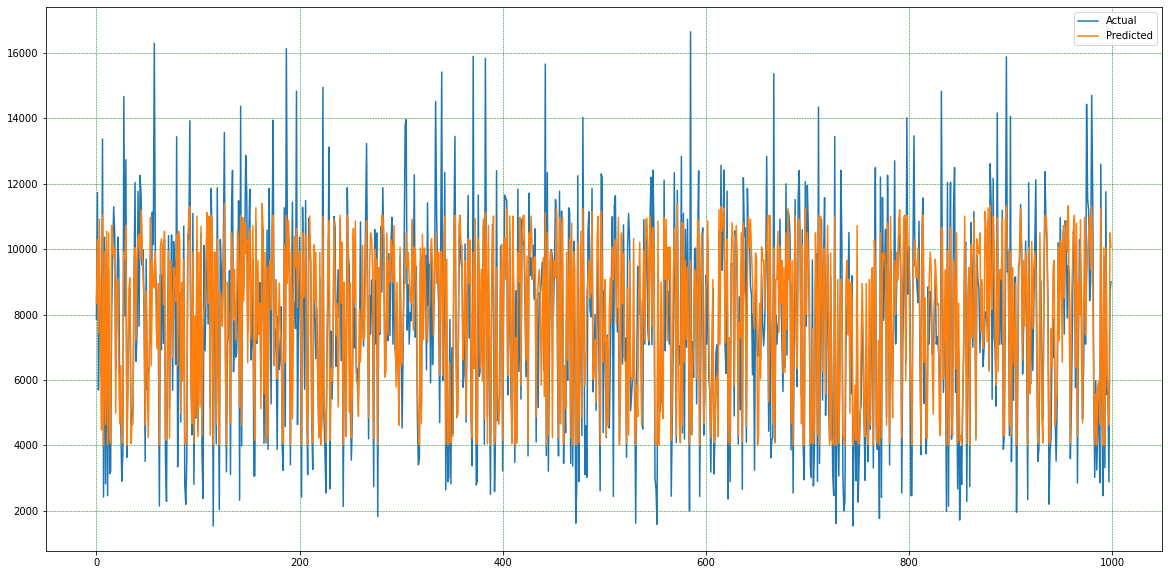

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

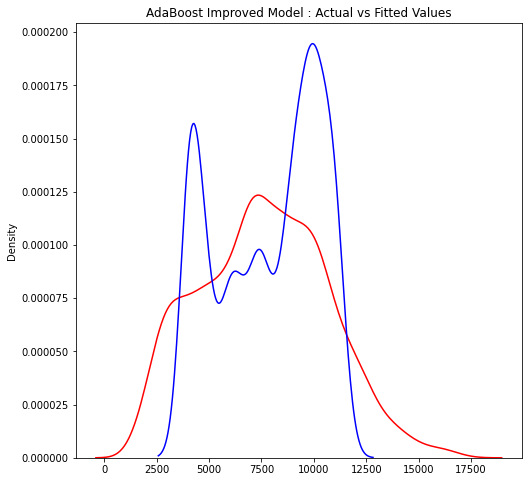

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('AdaBoost Improved Model : Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
AdaBoost2.score(test_features,test_labels)

0.6854925926640325

# Model Development with Linear Regression


In [ ]:
# Import the model we are using
from sklearn.linear_model import LinearRegression
# Instantiate model 
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
lin_reg = LinearRegression()
lin_reg.fit(train_features, train_labels)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
lin_reg_duration = t1-t0
print(lin_reg_duration)

0.01776719093322754


In [ ]:
# Use the model's predict method on the test data
predictions = lin_reg.predict(test_features)


In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')

from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for LinearRegression model is', "{:.2f}".format(r2*100) ,'%')

Mean Absolute Error: 1330.0216819853638 Kbps
Mean Squared Error: 3475151.6678992747 Kbps
Root Mean Squared Error: 1864.1758682858424 Kbps
Mean Absolute Percentage Error: 0.20358806345928923 %
R2 score for LinearRegression model is 62.75 %


In [ ]:
print('actuals', test_labels)

actuals [ 7851.850098 11727.08984   5691.549805 ...  7315.649902  6805.459961
  3179.550049]


In [ ]:
print('actuals', predictions)

actuals [7875.60389436 9895.43843588 7038.43758164 ... 6787.31493078 6873.18877607
 5513.53128678]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0      7851.850098   7875.603894
1     11727.089840   9895.438436
2      5691.549805   7038.437582
3      8156.450195  10361.261199
4      8185.080078   7658.764985
...            ...           ...
3415   6616.799805   7921.817298
3416   8229.059570   8664.029282
3417   7315.649902   6787.314931
3418   6805.459961   6873.188776
3419   3179.550049   5513.531287

[3420 rows x 2 columns]

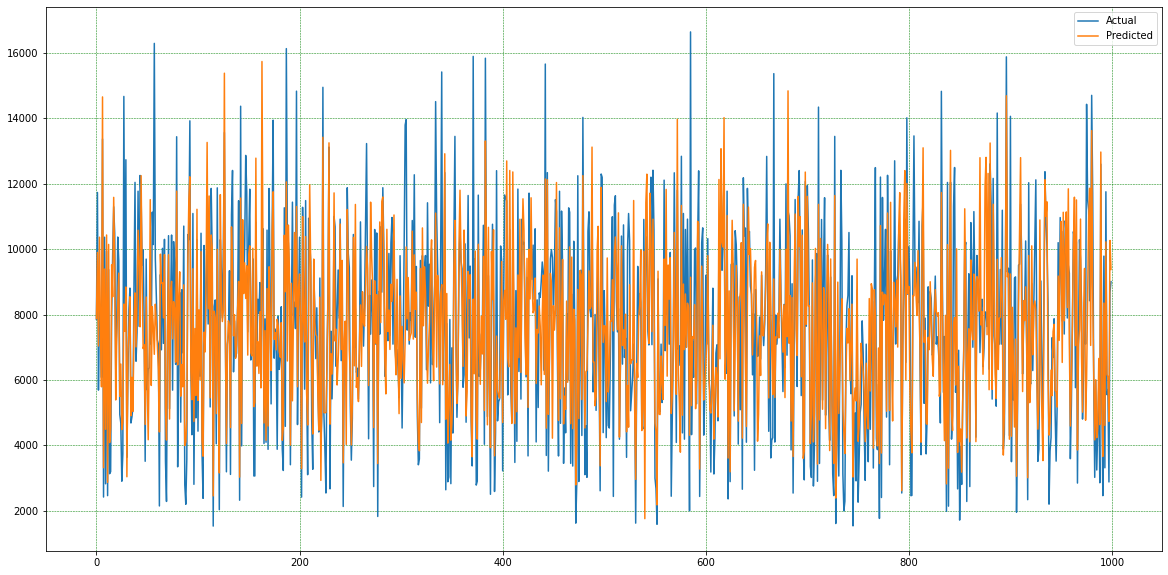

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

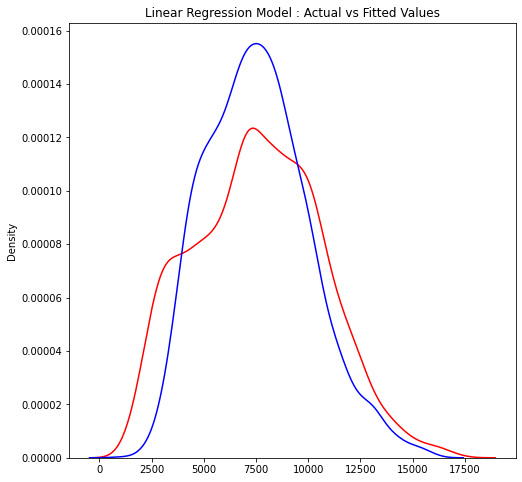

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Linear Regression Model : Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
lin_reg.score(test_features,test_labels)

0.6274519117627907

# Model Development with Ridge Regression


In [ ]:
# Import the model we are using
from sklearn.linear_model import Ridge
# Instantiate model 
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
rr1 = Ridge(alpha=0.01)
rr1.fit(train_features, train_labels)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
rr1_duration = t1-t0
print(rr1_duration)

0.007407188415527344


In [ ]:
# Use the model's predict method on the test data
predictions = rr1.predict(test_features)


In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for Ridge model is', "{:.2f}".format(r2*100) ,'%')

Mean Absolute Error: 1330.021780351904 Kbps
Mean Squared Error: 3475151.4977549557 Kbps
Mean Absolute Percentage Error: 0.2035881208881108 %
Root Mean Squared Error: 1864.175822650577 Kbps
R2 score for Ridge model is 62.75 %


In [ ]:
print('actuals', test_labels)

actuals [ 7851.850098 11727.08984   5691.549805 ...  7315.649902  6805.459961
  3179.550049]


In [ ]:
print('actuals', predictions)

actuals [7875.60278256 9895.43721347 7038.43611546 ... 6787.31344022 6873.18879867
 5513.52972893]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0      7851.850098   7875.602783
1     11727.089840   9895.437213
2      5691.549805   7038.436115
3      8156.450195  10361.260892
4      8185.080078   7658.762961
...            ...           ...
3415   6616.799805   7921.818986
3416   8229.059570   8664.028548
3417   7315.649902   6787.313440
3418   6805.459961   6873.188799
3419   3179.550049   5513.529729

[3420 rows x 2 columns]

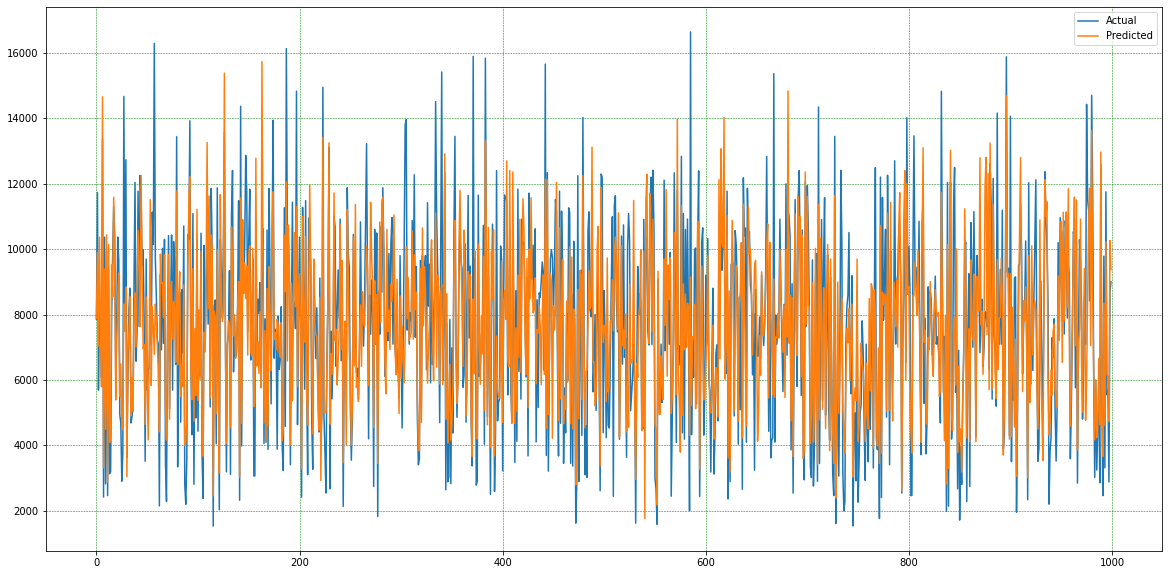

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

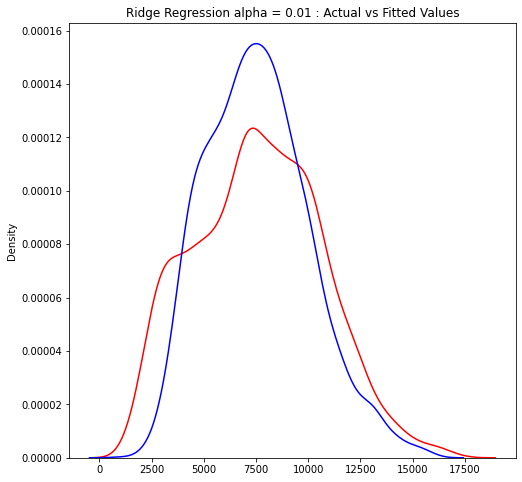

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Ridge Regression alpha = 0.01 : Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
rr1.score(test_features,test_labels)

0.6274519300028408

#  Ridge Regression With Hyperparameters Tuning


In [ ]:
# Import the model we are using
from sklearn.linear_model import Ridge
# Instantiate model 
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
rr2 = Ridge(alpha=0.0)
rr2.fit(train_features, train_labels)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
rr2_duration = t1-t0
print(rr2_duration)

0.0028619766235351562


In [ ]:
# Use the model's predict method on the test data
predictions = rr2.predict(test_features)


In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')
from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for Ridge model is', "{:.2f}".format(r2*100) ,'%')

Mean Absolute Error: 1330.0216819853645 Kbps
Mean Squared Error: 3475151.6678992733 Kbps
Root Mean Squared Error: 1864.1758682858422 Kbps
Mean Absolute Percentage Error: 0.20358806345928934 %
R2 score for Ridge model is 62.75 %


In [ ]:
print('actuals', test_labels)

actuals [ 7851.850098 11727.08984   5691.549805 ...  7315.649902  6805.459961
  3179.550049]


In [ ]:
print('actuals', predictions)

actuals [7875.60389436 9895.43843588 7038.43758164 ... 6787.31493078 6873.18877607
 5513.53128678]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0      7851.850098   7875.603894
1     11727.089840   9895.438436
2      5691.549805   7038.437582
3      8156.450195  10361.261199
4      8185.080078   7658.764985
...            ...           ...
3415   6616.799805   7921.817298
3416   8229.059570   8664.029282
3417   7315.649902   6787.314931
3418   6805.459961   6873.188776
3419   3179.550049   5513.531287

[3420 rows x 2 columns]

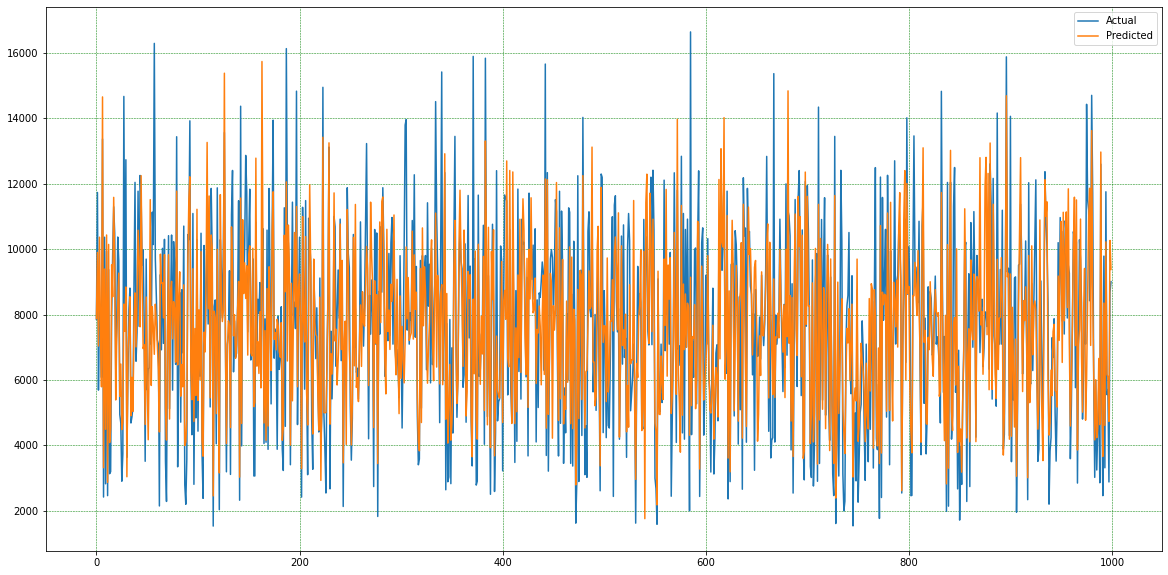

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

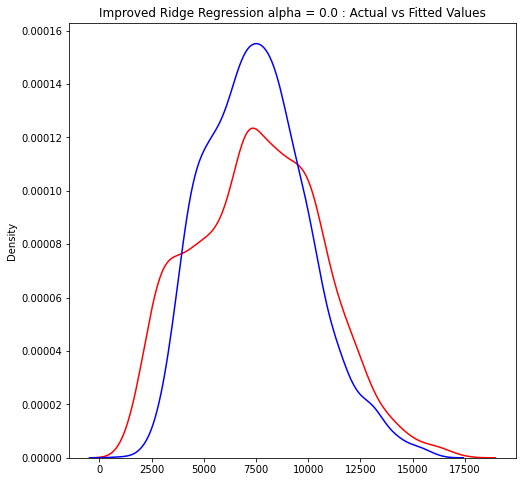

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Improved Ridge Regression alpha = 0.0 : Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
rr2.score(test_features,test_labels)

0.6274519117627908

# Model Development with Support Vector Regression


In [ ]:
from sklearn.svm import LinearSVR
# Instantiate model 
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
svm1 = LinearSVR( C=10)
svm1.fit(train_features, train_labels);
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
svm1_duration = t1-t0
print(svm1_duration)

0.02856898307800293


In [ ]:
# Use the forest's predict method on the test data
predictions = svm1.predict(test_features)


In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')

from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for SVM model is', "{:.2f}".format(r2*100) ,'%')

Mean Absolute Error: 1281.5012555619953 Kbps
Mean Squared Error: 3778782.734551239 Kbps
Root Mean Squared Error: 1943.9091374216127 Kbps
Mean Absolute Percentage Error: 0.17426044304393704 %
R2 score for SVM model is 59.49 %


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for support vector machine is', "{:.2f}".format(r2*100) ,'%')

R2 score for support vector machine is 59.49 %


In [ ]:
print('actuals', test_labels)

actuals [ 7851.850098 11727.08984   5691.549805 ...  7315.649902  6805.459961
  3179.550049]


In [ ]:
print('actuals', predictions)

actuals [ 7710.42833863 10105.42967666  6265.09650896 ...  6393.20146569
  6776.19375928  4532.14615766]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0      7851.850098   7710.428339
1     11727.089840  10105.429677
2      5691.549805   6265.096509
3      8156.450195  10649.546543
4      8185.080078   7462.932115
...            ...           ...
3415   6616.799805   7782.373978
3416   8229.059570   8600.114831
3417   7315.649902   6393.201466
3418   6805.459961   6776.193759
3419   3179.550049   4532.146158

[3420 rows x 2 columns]

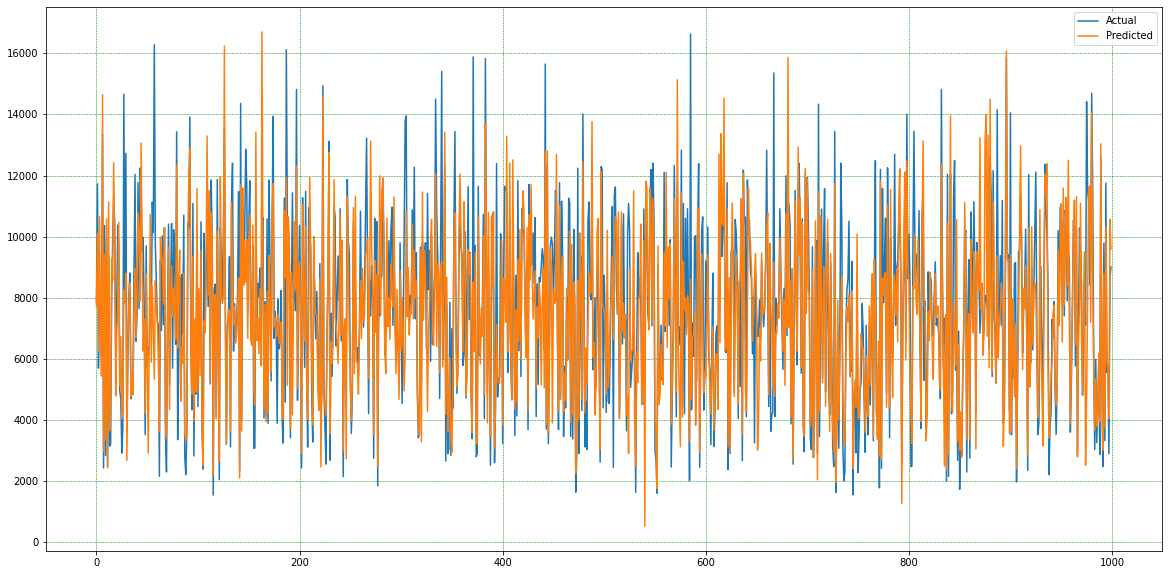

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

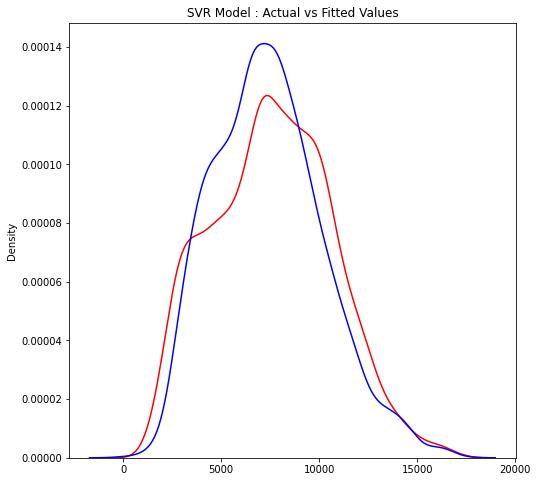

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('SVR Model : Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
svm1.score(test_features,test_labels)

0.5949016278556157

# Model Development with Gradient Boost


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Instantiate model 
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
gboosting1 = GradientBoostingRegressor(n_estimators=400, random_state=42,learning_rate = 1)
gboosting1.fit(train_features, train_labels);
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
gboosting1_duration = t1-t0
print(gboosting1_duration)


9.335026025772095


In [ ]:
predictions = gboosting1.predict(test_features)

In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')

from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for gBoosting model is', "{:.2f}".format(r2*100) ,'%')

Mean Absolute Error: 1210.2252889407587 Kbps
Mean Squared Error: 3415355.9243339314 Kbps
Root Mean Squared Error: 1848.0681600887808 Kbps
Mean Absolute Percentage Error: 0.1825327217386517 %
R2 score for gBoosting model is 63.39 %


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for gBoosting is', "{:.2f}".format(r2*100) ,'%')

R2 score for gBoosting is 63.39 %


In [ ]:
print('actuals', test_labels)

actuals [ 7851.850098 11727.08984   5691.549805 ...  7315.649902  6805.459961
  3179.550049]


In [ ]:
print('actuals', predictions)

actuals [ 8310.71805334 11338.77762875  9892.87468638 ...  4851.44793998
  5921.33934877  7915.11885077]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0      7851.850098   8310.718053
1     11727.089840  11338.777629
2      5691.549805   9892.874686
3      8156.450195   8771.861364
4      8185.080078   8150.082215
...            ...           ...
3415   6616.799805   7456.911102
3416   8229.059570   9443.719843
3417   7315.649902   4851.447940
3418   6805.459961   5921.339349
3419   3179.550049   7915.118851

[3420 rows x 2 columns]

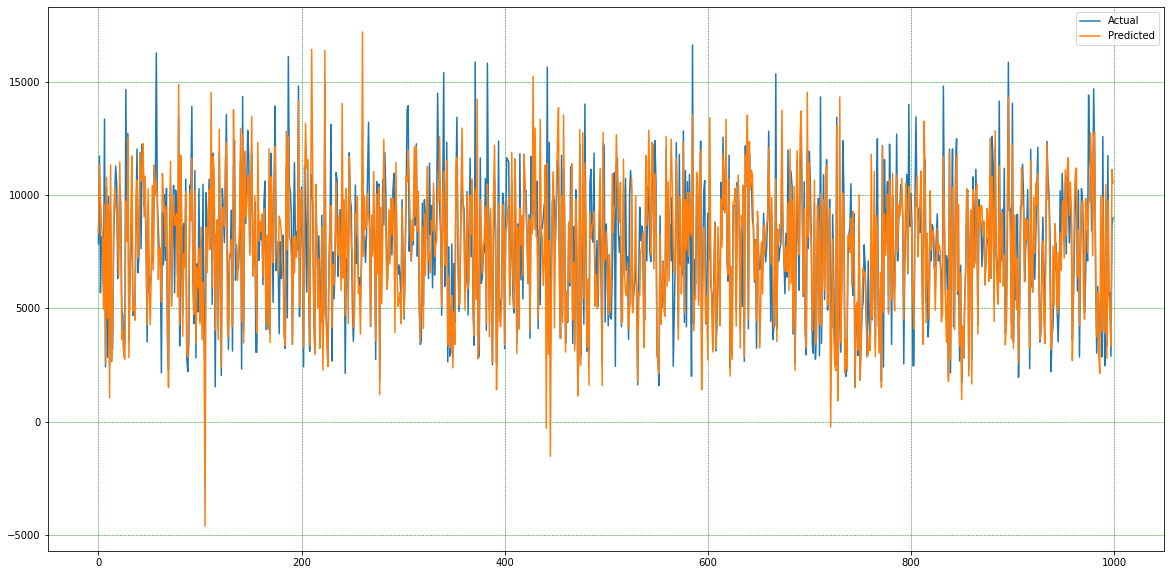

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

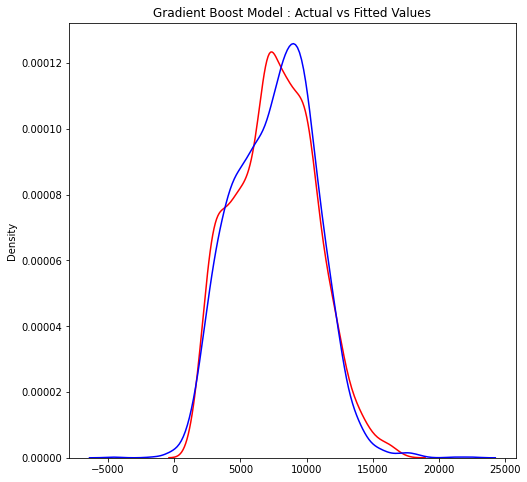

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Gradient Boost Model : Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
gboosting1.score(test_features,test_labels)

0.6338622190180874

# Gradient Boosting Hyperparameters Tuning

In [ ]:
gboosting1.get_params(deep=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params =  {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500,800,1000,1500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "learning_rate": (0.01, 0.1,0.2,0.3),
    'max_depth': [3,5,6],
    'loss': ['ls', 'lad','huber','quantile'],
}

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(train_features, train_labels)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")
# Evaluate the model using the test data
predictions = model.predict(test_features)
mse = mean_squared_error(test_labels, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(test_labels, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(test_labels, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Downlink Throughput Prediction')
# overlay the regression line
z = np.polyfit(test_labels, predictions, 1)
p = np.poly1d(z)
plt.plot(test_labels,p(test_labels), color='magenta')
plt.show()

# Gradient Boost with Hyperparameters Tuning


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Instantiate model 
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
gboosting2 = GradientBoostingRegressor(n_estimators=800, random_state=42,learning_rate = 0.1)
gboosting2.fit(train_features, train_labels);
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
gboosting2_duration = t1-t0
print(gboosting2_duration)


18.458103895187378


In [ ]:
predictions = gboosting2.predict(test_features)

In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')
from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for gBoosting model is', "{:.2f}".format(r2*100) ,'%')

Mean Absolute Error: 914.4883514073764 Kbps
Mean Squared Error: 1995492.5980568903 Kbps
Root Mean Squared Error: 1412.6190562415934 Kbps
Mean Absolute Percentage Error: 0.13145007781107468 %
R2 score for gBoosting model is 78.61 %


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for gBoosting is', "{:.2f}".format(r2*100) ,'%')

R2 score for gBoosting is 78.61 %


In [ ]:
print('actuals', test_labels)

actuals [ 7851.850098 11727.08984   5691.549805 ...  7315.649902  6805.459961
  3179.550049]


In [ ]:
print('actuals', predictions)

actuals [ 8612.6887203  11060.87092136  7504.98955229 ...  6998.19284075
  6910.3302609   5751.53062006]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0      7851.850098   8612.688720
1     11727.089840  11060.870921
2      5691.549805   7504.989552
3      8156.450195  10467.003567
4      8185.080078   7923.540781
...            ...           ...
3415   6616.799805   7961.097345
3416   8229.059570  10089.450688
3417   7315.649902   6998.192841
3418   6805.459961   6910.330261
3419   3179.550049   5751.530620

[3420 rows x 2 columns]

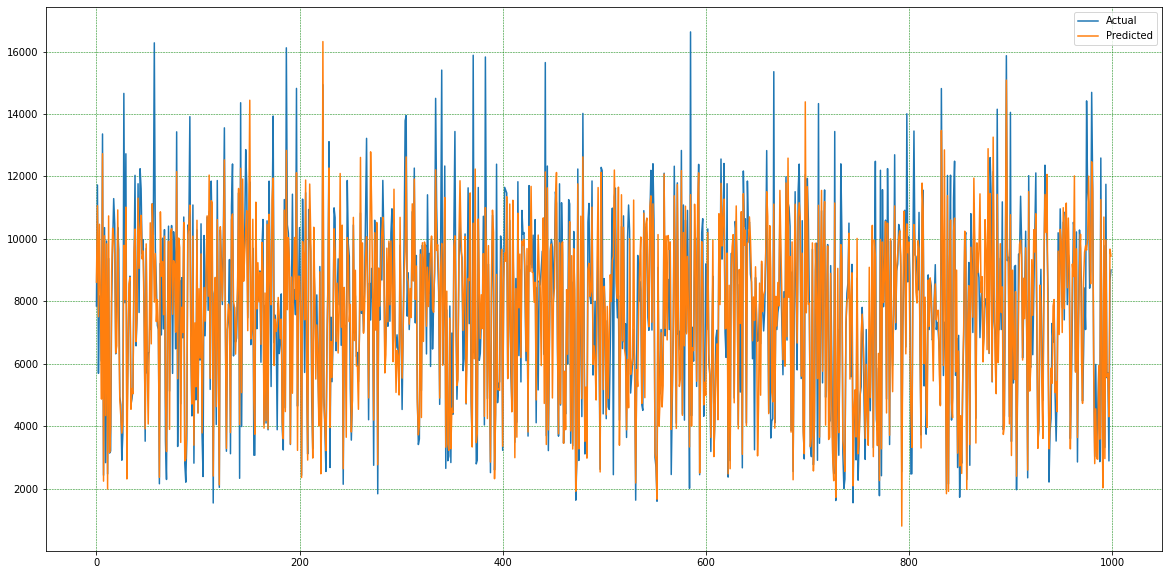

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

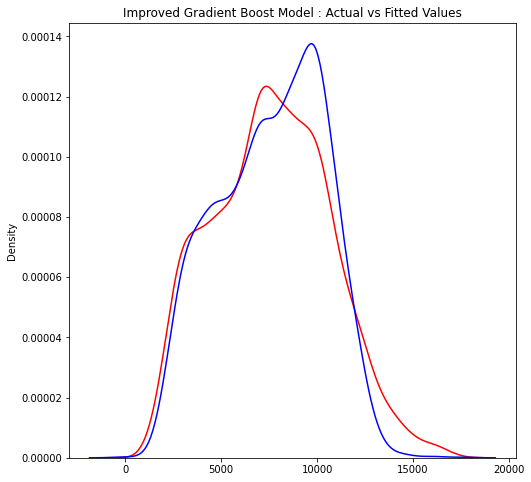

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Improved Gradient Boost Model : Actual vs Fitted Values')


plt.show()
plt.close()

In [ ]:
gboosting2.score(test_features,test_labels)

0.7860764008187904

# Model Development with K-Nearest Neighbor


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# Instantiate model 
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
knn1 = KNeighborsRegressor(n_neighbors=11 , weights='distance')
knn1.fit(train_features, train_labels)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
knn1_duration = t1-t0
print(knn1_duration)

0.025625944137573242


In [ ]:
predictions = knn1.predict(test_features)
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')
from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for KNN model is', "{:.2f}".format(r2*100) ,'%')

Mean Absolute Error: 1021.1301948331991 Kbps
Mean Squared Error: 2296173.2873101733 Kbps
Root Mean Squared Error: 1515.3129337896423 Kbps
Mean Absolute Percentage Error: 0.15310214655013019 %
R2 score for KNN model is 75.38 %


In [ ]:
print('actuals', test_labels)

actuals [ 7851.850098 11727.08984   5691.549805 ...  7315.649902  6805.459961
  3179.550049]


In [ ]:
print('actuals', predictions)

actuals [ 8902.99727262 10471.50514063  6701.68114003 ...  6274.07765809
  6829.73175055  4869.32105478]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0      7851.850098   8902.997273
1     11727.089840  10471.505141
2      5691.549805   6701.681140
3      8156.450195   9595.623939
4      8185.080078   7314.179525
...            ...           ...
3415   6616.799805   7602.587052
3416   8229.059570   9399.244789
3417   7315.649902   6274.077658
3418   6805.459961   6829.731751
3419   3179.550049   4869.321055

[3420 rows x 2 columns]

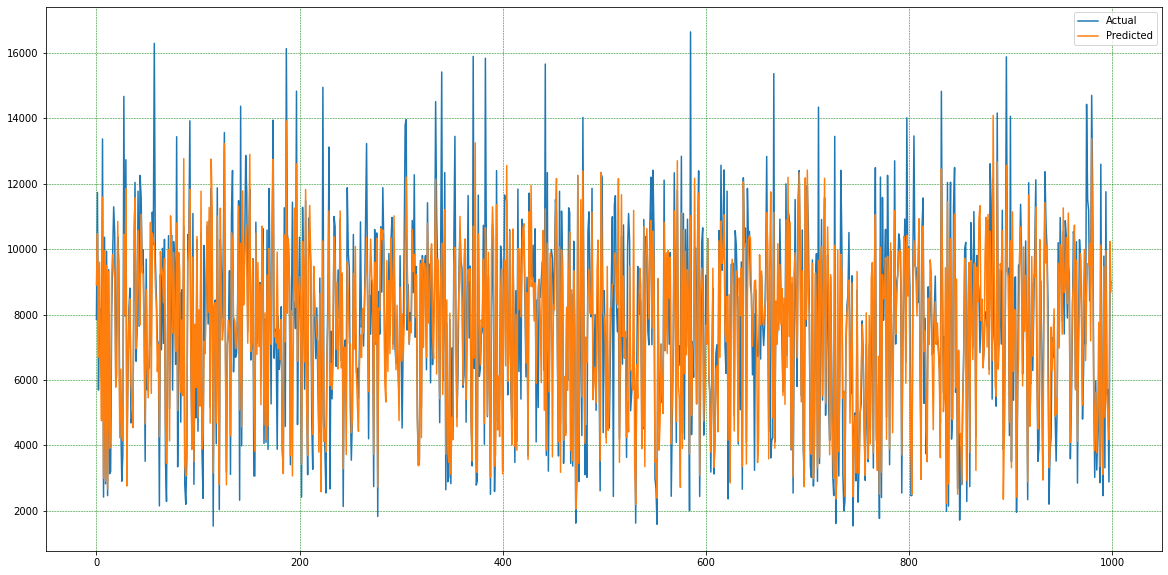

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

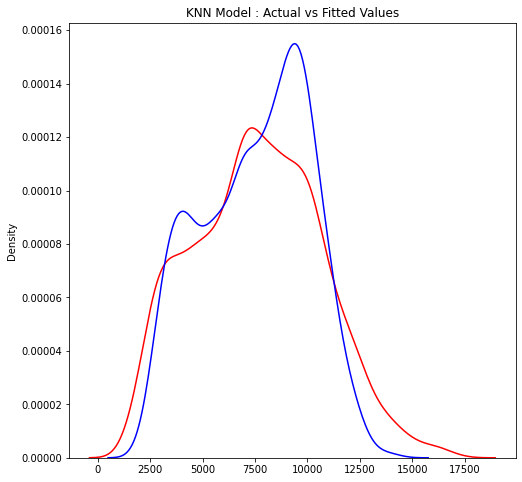

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('KNN Model : Actual vs Fitted Values')


plt.show()
plt.close()

# KNN Hyperparameters Tuning Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsRegressor(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(train_features, train_labels)

In [ ]:
# Get the results
print(g_res.best_score_)
print(g_res.best_estimator_)
print(g_res.best_params_)

#  K-Nearest Neighbor with Hyperparameters Tuning

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# Instantiate model 
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
knn2 = KNeighborsRegressor(n_neighbors=15 , weights='distance',metric = 'manhattan')
knn2.fit(train_features, train_labels)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
knn2_duration = t1-t0
print(knn2_duration)

0.01389002799987793


In [ ]:
predictions = knn2.predict(test_features)
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(test_labels, predictions), '%')

from sklearn.metrics import r2_score
r2 = r2_score(test_labels, predictions)
print('R2 score for KNN model is', "{:.2f}".format(r2*100) ,'%')

Mean Absolute Error: 988.7577305373758 Kbps
Mean Squared Error: 2212694.251621011 Kbps
Root Mean Squared Error: 1487.512773599276 Kbps
Mean Absolute Percentage Error: 0.14650749658063858 %
R2 score for KNN model is 76.28 %


In [ ]:
print('actuals', test_labels)

actuals [ 7851.850098 11727.08984   5691.549805 ...  7315.649902  6805.459961
  3179.550049]


In [ ]:
print('actuals', predictions)

actuals [ 8699.22386919 10156.23875984  6710.81819149 ...  5891.76647418
  6931.50480732  5436.74309177]


In [ ]:
# Relative error
def mean_relative_error(test_labels, predictions):
    relative_error = np.average(np.abs(test_labels - predictions) / test_labels, axis=0)
    print('RE', relative_error)

In [ ]:
df=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df

Actual     Predicted
0      7851.850098   8699.223869
1     11727.089840  10156.238760
2      5691.549805   6710.818191
3      8156.450195   9836.555699
4      8185.080078   7209.439774
...            ...           ...
3415   6616.799805   7567.123260
3416   8229.059570   9282.268689
3417   7315.649902   5891.766474
3418   6805.459961   6931.504807
3419   3179.550049   5436.743092

[3420 rows x 2 columns]

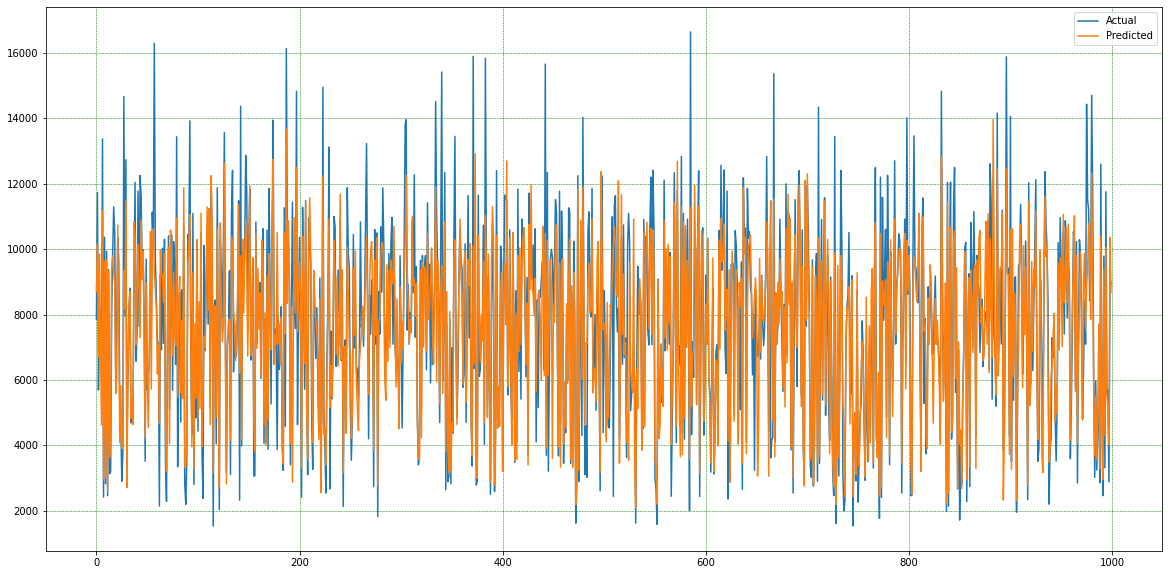

In [ ]:
df1 = df.head(1000)
df1.plot(kind='line',figsize=(20,10))
plt.grid(which='major', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black')
plt.show()

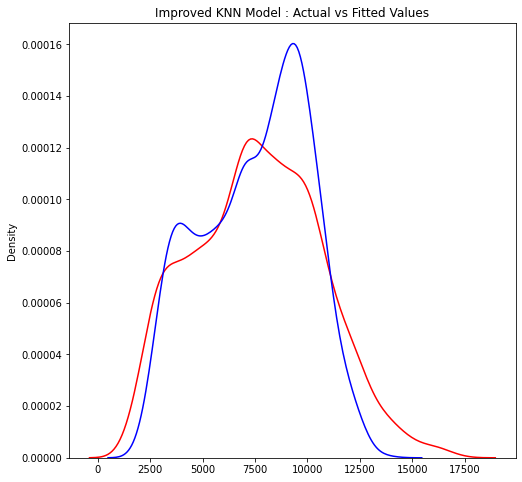

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Improved KNN Model : Actual vs Fitted Values')


plt.show()
plt.close()

# Evaluate

In [ ]:
model_eval = pd.DataFrame(columns=['MAE (kbps)','RMSE (kbps)','MAPE (%)', 'R2 Score','Duration (ms)',], 
                     index=['Random Forest with 400 Trees',
                            'Random Forest with Hyperparameters Tuning',
                            'Extra Tree with 400 Trees',
                            'AdaBoost',
                            'AdaBoost with Hyperparameters Tuning',
                            'Gradient Boost',
                            'Gradient Boost with Hyperparameters Tuning',
                             'Linear Regression',
                            'Ridge Regression alpha=0.01',
                            'Ridge Regression alpha=0.0',
                            'SVR',
                           'KNN',
                        'KNN with Hyperparameters Tuning' ])

from sklearn import metrics
from sklearn.metrics import mean_squared_error

model_eval.loc['Random Forest with 400 Trees', 'MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=rf.predict(test_features))
model_eval.loc['Random Forest with Hyperparameters Tuning', 'MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=rf1.predict(test_features))
model_eval.loc['Extra Tree with 400 Trees', 'MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=reg.predict(test_features))
model_eval.loc['AdaBoost', 'MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=AdaBoost1.predict(test_features))
model_eval.loc['AdaBoost with Hyperparameters Tuning', 'MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=AdaBoost2.predict(test_features))
model_eval.loc['Gradient Boost', 'MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=gboosting1.predict(test_features))
model_eval.loc['Gradient Boost with Hyperparameters Tuning', 'MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=gboosting2.predict(test_features))
model_eval.loc['Linear Regression', 'MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=lin_reg.predict(test_features))
model_eval.loc['Ridge Regression alpha=0.01','MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=rr1.predict(test_features))
model_eval.loc['Ridge Regression alpha=0.0','MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=rr2.predict(test_features))
model_eval.loc['SVR', 'MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=svm1.predict(test_features))
model_eval.loc['KNN', 'MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=knn1.predict(test_features))
model_eval.loc['KNN with Hyperparameters Tuning', 'MAE (kbps)'] = metrics.mean_absolute_error(y_true=test_labels, y_pred=knn2.predict(test_features))

model_eval.loc['Random Forest with 400 Trees', 'MAPE (%)'] = metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=rf.predict(test_features))
model_eval.loc['Random Forest with Hyperparameters Tuning', 'MAPE (%)'] = metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=rf1.predict(test_features))
model_eval.loc['Extra Tree with 400 Trees', 'MAPE (%)'] = metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=reg.predict(test_features))
model_eval.loc['AdaBoost', 'MAPE (%)'] = metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=AdaBoost1.predict(test_features))
model_eval.loc['AdaBoost with Hyperparameters Tuning', 'MAPE (%)'] = metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=AdaBoost2.predict(test_features))
model_eval.loc['Gradient Boost', 'MAPE (%)'] = metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=gboosting1.predict(test_features))
model_eval.loc['Gradient Boost with Hyperparameters Tuning', 'MAPE (%)'] = metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=gboosting2.predict(test_features))
model_eval.loc['Linear Regression', 'MAPE (%)'] = metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=lin_reg.predict(test_features))
model_eval.loc['Ridge Regression alpha=0.01','MAPE (%)'] =metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=rr1.predict(test_features))
model_eval.loc['Ridge Regression alpha=0.0','MAPE (%)'] = metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=rr2.predict(test_features))
model_eval.loc['SVR', 'MAPE (%)'] = metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=svm1.predict(test_features))
model_eval.loc['KNN', 'MAPE (%)'] = metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=knn1.predict(test_features))
model_eval.loc['KNN with Hyperparameters Tuning', 'MAPE (%)'] = metrics.mean_absolute_percentage_error(y_true=test_labels, y_pred=knn2.predict(test_features))




model_eval.loc['Random Forest with 400 Trees', 'RMSE (kbps)'] = np.sqrt(mean_squared_error(y_true=test_labels, y_pred=rf.predict(test_features)))
model_eval.loc['Random Forest with Hyperparameters Tuning', 'RMSE (kbps)'] = np.sqrt(mean_squared_error(y_true=test_labels, y_pred=rf1.predict(test_features)))
model_eval.loc['Extra Tree with 400 Trees', 'RMSE (kbps)'] = np.sqrt(mean_squared_error(y_true=test_labels, y_pred=reg.predict(test_features)))
model_eval.loc['AdaBoost', 'RMSE (kbps)'] = np.sqrt(mean_squared_error(y_true=test_labels, y_pred=AdaBoost1.predict(test_features)))
model_eval.loc['AdaBoost with Hyperparameters Tuning', 'RMSE (kbps)'] = np.sqrt(mean_squared_error(y_true=test_labels, y_pred=AdaBoost2.predict(test_features)))
model_eval.loc['Gradient Boost', 'RMSE (kbps)'] = np.sqrt(mean_squared_error(y_true=test_labels, y_pred=gboosting1.predict(test_features)))
model_eval.loc['Gradient Boost with Hyperparameters Tuning', 'RMSE (kbps)'] = np.sqrt(mean_squared_error(y_true=test_labels, y_pred=gboosting2.predict(test_features)))
model_eval.loc['Linear Regression', 'RMSE (kbps)'] = np.sqrt(mean_squared_error(y_true=test_labels, y_pred=lin_reg.predict(test_features)))
model_eval.loc['Ridge Regression alpha=0.01', 'RMSE (kbps)'] = np.sqrt(mean_squared_error(y_true=test_labels, y_pred=rr1.predict(test_features)))
model_eval.loc['Ridge Regression alpha=0.0','RMSE (kbps)'] =  np.sqrt(mean_squared_error(y_true=test_labels, y_pred=rr2.predict(test_features)))
model_eval.loc['SVR', 'RMSE (kbps)'] = np.sqrt(mean_squared_error(y_true=test_labels, y_pred=svm1.predict(test_features)))
model_eval.loc['KNN', 'RMSE (kbps)'] = np.sqrt(mean_squared_error(y_true=test_labels, y_pred=knn1.predict(test_features)))
model_eval.loc['KNN with Hyperparameters Tuning','RMSE (kbps)'] = np.sqrt(mean_squared_error(y_true=test_labels, y_pred=knn2.predict(test_features)))

model_eval.loc['Random Forest with 400 Trees', 'R2 Score'] = r2_score(y_true=test_labels, y_pred=rf.predict(test_features)).round(3)
model_eval.loc['Random Forest with Hyperparameters Tuning', 'R2 Score'] = r2_score(y_true=test_labels, y_pred=rf1.predict(test_features)).round(3)
model_eval.loc['Extra Tree with 400 Trees', 'R2 Score'] = r2_score(y_true=test_labels, y_pred=reg.predict(test_features)).round(3)
model_eval.loc['AdaBoost', 'R2 Score'] = r2_score(y_true=test_labels, y_pred=AdaBoost1.predict(test_features)).round(3)
model_eval.loc['AdaBoost with Hyperparameters Tuning', 'R2 Score'] = r2_score(y_true=test_labels, y_pred=AdaBoost2.predict(test_features)).round(3)
model_eval.loc['Gradient Boost','R2 Score'] = r2_score(y_true=test_labels, y_pred=gboosting1.predict(test_features)).round(3)
model_eval.loc['Gradient Boost with Hyperparameters Tuning','R2 Score'] = r2_score(y_true=test_labels, y_pred=gboosting2.predict(test_features)).round(3)
model_eval.loc['Linear Regression', 'R2 Score'] = r2_score(y_true=test_labels, y_pred=lin_reg.predict(test_features)).round(3)
model_eval.loc['Ridge Regression alpha=0.01', 'R2 Score'] = r2_score(y_true=test_labels, y_pred=rr1.predict(test_features)).round(3)
model_eval.loc['Ridge Regression alpha=0.0', 'R2 Score'] = r2_score(y_true=test_labels, y_pred=rr2.predict(test_features)).round(3)
model_eval.loc['SVR','R2 Score'] = r2_score(y_true=test_labels, y_pred=svm1.predict(test_features)).round(3)
model_eval.loc['KNN', 'R2 Score'] = r2_score(y_true=test_labels, y_pred=knn1.predict(test_features)).round(3)
model_eval.loc['KNN with Hyperparameters Tuning', 'R2 Score'] = r2_score(y_true=test_labels, y_pred=knn2.predict(test_features)).round(3)

model_eval.loc['Random Forest with 400 Trees', 'Duration (ms)'] =rf_duration*1000
model_eval.loc['Random Forest with Hyperparameters Tuning', 'Duration (ms)'] =rf1_duration*1000
model_eval.loc['Extra Tree with 400 Trees', 'Duration (ms)'] = extratree_duration*1000
model_eval.loc['AdaBoost', 'Duration (ms)'] = AdaBoost1_duration*1000
model_eval.loc['AdaBoost with Hyperparameters Tuning', 'Duration (ms)'] = AdaBoost2_duration*1000
model_eval.loc['Gradient Boost','Duration (ms)'] = gboosting1_duration*1000
model_eval.loc['Gradient Boost with Hyperparameters Tuning','Duration (ms)'] = gboosting2_duration*1000
model_eval.loc['Linear Regression', 'Duration (ms)'] = lin_reg_duration*1000
model_eval.loc['Ridge Regression alpha=0.01', 'Duration (ms)'] = rr1_duration*1000
model_eval.loc['Ridge Regression alpha=0.0', 'Duration (ms)'] = rr2_duration*1000
model_eval.loc['SVR','Duration (ms)'] = svm1_duration*1000
model_eval.loc['KNN', 'Duration (ms)'] = knn1_duration*1000
model_eval.loc['KNN with Hyperparameters Tuning', 'Duration (ms)'] = knn2_duration*1000



model_eval

MAE (kbps)  RMSE (kbps)  \
Random Forest with 400 Trees                1214.411326  1873.710286   
Random Forest with Hyperparameters Tuning    906.301337  1379.994714   
Extra Tree with 400 Trees                    889.614202  1375.497441   
AdaBoost                                    1946.614181  2317.761284   
AdaBoost with Hyperparameters Tuning        1284.775661  1712.817736   
Gradient Boost                              1210.225289   1848.06816   
Gradient Boost with Hyperparameters Tuning   914.488351  1412.619056   
Linear Regression                           1330.021682  1864.175868   
Ridge Regression alpha=0.01                  1330.02178  1864.175823   
Ridge Regression alpha=0.0                  1330.021682  1864.175868   
SVR                                         1281.501256  1943.909137   
KNN                                         1021.130195  1515.312934   
KNN with Hyperparameters Tuning              988.757731  1487.512774   

                                            MAPE (%) R2 Score Duration (ms)  
Random Forest with 400 Trees                0.173933    0.624  41687.048912  
Random Forest with Hyperparameters Tuning   0.134044    0.796  36911.526918  
Extra Tree with 400 Trees                   0.129521    0.797   7335.768938  
AdaBoost                                    0.343717    0.424   4383.664131  
AdaBoost with Hyperparameters Tuning        0.210755    0.685   1304.608822  
Gradient Boost                              0.182533    0.634   9335.026026  
Gradient Boost with Hyperparameters Tuning   0.13145    0.786  18458.103895  
Linear Regression                           0.203588    0.627     17.767191  
Ridge Regression alpha=0.01                 0.203588    0.627      7.407188  
Ridge Regression alpha=0.0                  0.203588    0.627      2.861977  
SVR                                          0.17426    0.595     28.568983  
KNN                                         0.153102    0.754     25.625944  
KNN with Hyperparameters Tuning             0.146507    0.763     13.890028

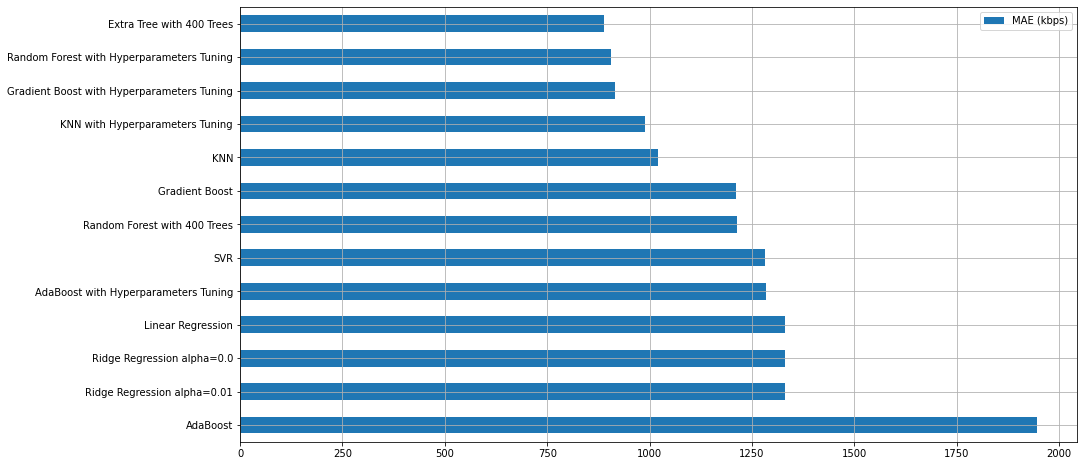

In [ ]:
fig, ax = plt.subplots()
model_eval[['MAE (kbps)']].sort_values(by='MAE (kbps)', ascending=False).plot(kind='barh', ax=ax,figsize=(15, 8))
ax.grid()

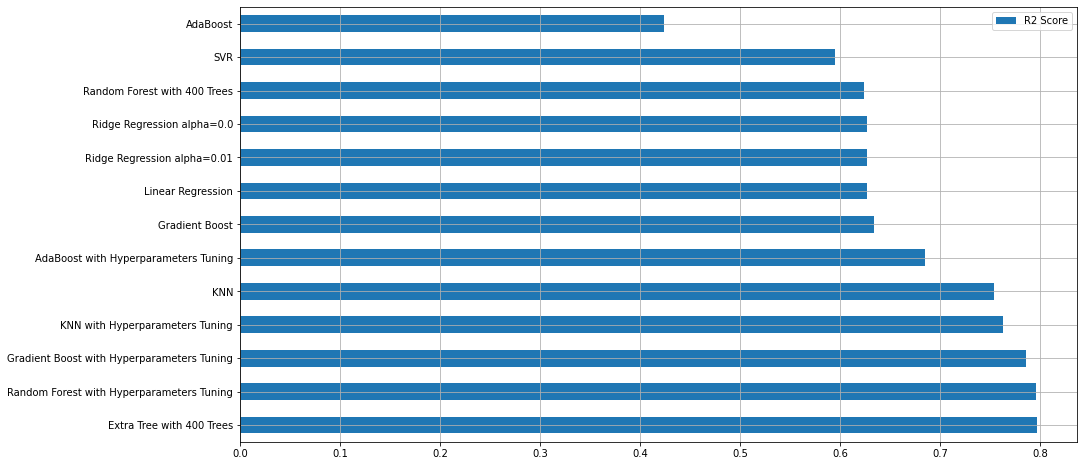

In [ ]:
fig, ax = plt.subplots()
model_eval[['R2 Score']].sort_values(by='R2 Score', ascending=False).plot(kind='barh', ax=ax,figsize=(15, 8))
ax.grid()

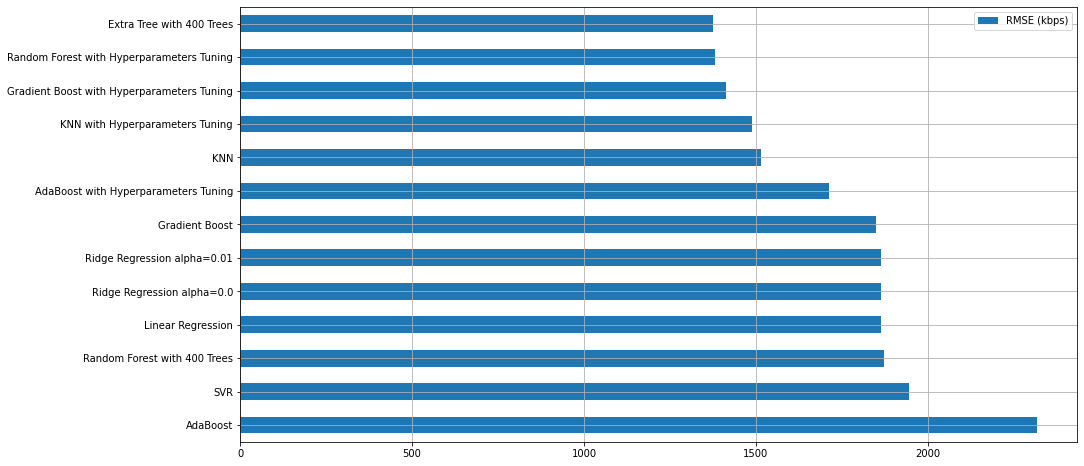

In [ ]:
fig, ax = plt.subplots()
model_eval[['RMSE (kbps)']].sort_values(by='RMSE (kbps)', ascending=False).plot(kind='barh', ax=ax,figsize=(15, 8))
ax.grid()

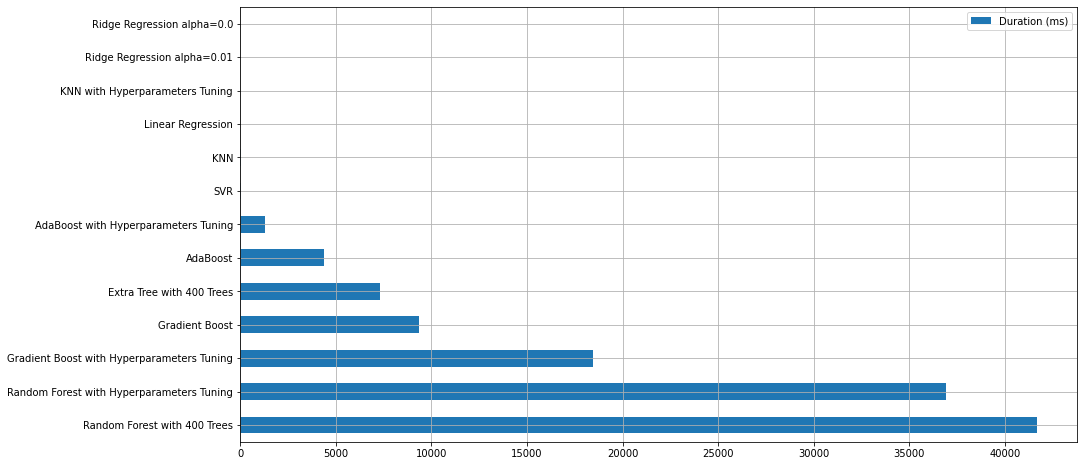

In [ ]:
fig, ax = plt.subplots()
model_eval[['Duration (ms)']].sort_values(by='Duration (ms)', ascending=False).plot(kind='barh', ax=ax,figsize=(15, 8))
ax.grid()

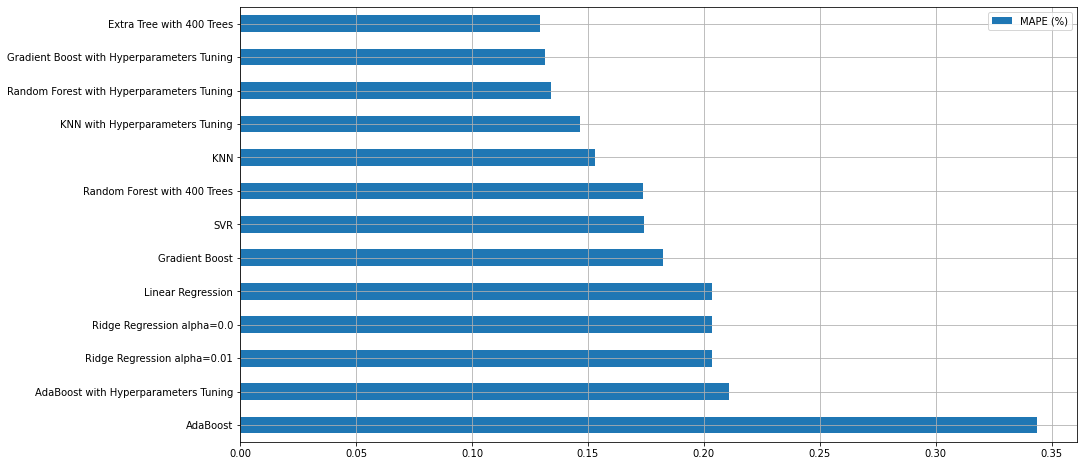

In [ ]:
fig, ax = plt.subplots()
model_eval[['MAPE (%)']].sort_values(by='MAPE (%)', ascending=False).plot(kind='barh', ax=ax,figsize=(15, 8))
ax.grid()

# ANN

In [ ]:
import pickle
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')
import random
import random
import tensorflow.keras.utils
import tensorflow.keras.models as models
from tensorflow.keras.layers import Reshape,Dense,Dropout,Activation,Flatten,Layer
import tensorflow.keras.layers 
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.regularizers import *
from tensorflow.keras.optimizers import *
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras
import tensorflow as tf
import keras
import tensorflow.keras.layers as tfl
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization
from tensorflow.keras import regularizers

ANN Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = models.Sequential()
# model.add(BatchNormalization())
model.add(Dense(2048,input_dim=11,activation='LeakyReLU'))

model.add(Dense(1024,activation='LeakyReLU',name="dense1"))
model.add(Dropout(0.5,name="drop1"))



model.add(Dense(512,activation='LeakyReLU',name="dense2"))
model.add(Dropout(0.2,name="drop2"))

model.add(Dense(256,activation='LeakyReLU',name="dense3"))
model.add(Dropout(0.2,name="drop3"))

model.add(Dense(128,activation='LeakyReLU',name="dense4"))
model.add(Dropout(0.2,name="drop4"))

model.add(Dense(1,activation='LeakyReLU', name="dense5"))


model.compile(loss ='mse',optimizer='adam',metrics = ['mae'])

model.summary()

In [ ]:
from keras.callbacks import ModelCheckpoint
# Instantiate model 
ct0 = datetime.now(tz=None)
t0 = ct0.timestamp()
monitors = ModelCheckpoint(filepath='monitor.hdf5',verbose=1,save_best_only=True)
history = model.fit(train_features,train_labels,validation_split=0.1,callbacks=[monitors],verbose=2,epochs = 100,shuffle=True,batch_size=64)
ct1 = datetime.now(tz=None)
t1=ct1.timestamp()
model_duration = t1-t0

In [ ]:
print('Model Duration is : ',"{:.2f}".format(model_duration/60), 'Minutes')

In [ ]:
model.evaluate(test_features,test_labels)

In [ ]:
plt.figure()
plt.title('Training performance')
plt.plot(range(len(history.history["loss"])),history.history["loss"],label ="'train loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label ="validation loss")
plt.legend()

In [ ]:
predictions = model.predict(test_features)

In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions),'Kbps')
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions), 'Kbps')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)),'Kbps')

In [ ]:
print('actuals', test_labels)

In [ ]:
print('predictions', predictions)

In [ ]:
print("predictions shape:", predictions.shape)

In [ ]:
plt.figure(figsize=(8, 8))
ax = sn.distplot(test_labels, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values')


plt.show()
plt.close()